<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week42.do.txt --no_mako -->
<!-- dom:TITLE: Week 42 Constructing a Neural Network code with examples -->

# Week 42 Constructing a Neural Network code with examples
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and Facility for Rare Isotope Beams, Michigan State University

Date: **October 14-18, 2024**

## Lecture October 14, 2024
1. Building our own Feed-forward Neural Network and discussion of project 2

**Readings and videos.**

1. These lecture notes

2. [Video of lecture](https://youtu.be/7B2F35gNj2Y)

3. [Whiteboard notes](https://github.com/CompPhysics/MachineLearning/blob/master/doc/HandWrittenNotes/2024/NotesOct14.pdf)

4. For a more in depth discussion on  neural networks we recommend Goodfellow et al chapters 6 and 7.     

5. Neural Networks demystified at <https://www.youtube.com/watch?v=bxe2T-V8XRs&list=PLiaHhY2iBX9hdHaRr6b7XevZtgZRa1PoU&ab_channel=WelchLabs>

6. Building Neural Networks from scratch at <https://www.youtube.com/watch?v=Wo5dMEP_BbI&list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3&ab_channel=sentdex>

7. Video on Neural Networks at <https://www.youtube.com/watch?v=CqOfi41LfDw>

8. Video on the back propagation algorithm at <https://www.youtube.com/watch?v=Ilg3gGewQ5U>

I also  recommend Michael Nielsen's intuitive approach to the neural networks and the universal approximation theorem, see the slides at <http://neuralnetworksanddeeplearning.com/chap4.html>.

## Material for the active learning sessions on Tuesday and Wednesday
  * Exercise on starting to write a code for neural networks, feed forward part. We will also continue ur discussions of gradient descent methods from last week. If you have time, start considering the back-propagation part as well (exercises for next week)

  * Discussion of project 2

  

**Note**: some of the codes will also be discussed next week in connection with the solution of differential equations.

## Writing a code which implements a feed-forward neural network

Last week we discussed the basics of neural networks and deep learning
and the basics of automatic differentiation.  We looked also at
examples on how compute the parameters of a simple network with scalar
inputs and ouputs and no or just one hidden layers.

We ended our discussions with the derivation of the equations for a
neural network with one hidden layers and two input variables and two
hidden nodes but only one output node.

## Mathematics of deep learning

**Two recent books online.**

1. [The Modern Mathematics of Deep Learning, by Julius Berner, Philipp Grohs, Gitta Kutyniok, Philipp Petersen](https://arxiv.org/abs/2105.04026), published as [Mathematical Aspects of Deep Learning, pp. 1-111. Cambridge University Press, 2022](https://doi.org/10.1017/9781009025096.002)

2. [Mathematical Introduction to Deep Learning: Methods, Implementations, and Theory, Arnulf Jentzen, Benno Kuckuck, Philippe von Wurstemberger](https://doi.org/10.48550/arXiv.2310.20360)

## Reminder on books with hands-on material and codes
* [Sebastian Rashcka et al, Machine learning with Sickit-Learn and PyTorch](https://sebastianraschka.com/blog/2022/ml-pytorch-book.html)

## Reading recommendations

1. Rashkca et al., chapter 11, jupyter-notebook sent separately, from [GitHub](https://github.com/rasbt/machine-learning-book)

2. Goodfellow et al, chapter 6 and 7 contain most of the neural network background.

## First network example, simple percepetron with one input

As yet another example we define now a simple perceptron model with
all quantities given by scalars. We consider only one input variable
$x$ and one target value $y$.  We define an activation function
$\sigma_1$ which takes as input

$$
z_1 = w_1x+b_1,
$$

where $w_1$ is the weight and $b_1$ is the bias. These are the
parameters we want to optimize.  The output is $a_1=\sigma(z_1)$ (see
graph from whiteboard notes). This output is then fed into the
**cost/loss** function, which we here for the sake of simplicity just
define as the squared error

$$
C(x;w_1,b_1)=\frac{1}{2}(a_1-y)^2.
$$

## Layout of a simple neural network with no hidden layer

<!-- dom:FIGURE: [figures/simplenn1.png, width=900 frac=1.0] -->
<!-- begin figure -->

<img src="figures/simplenn1.png" width="900"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Optimizing the parameters

In setting up the feed forward and back propagation parts of the
algorithm, we need now the derivative of the various variables we want
to train.

We need

$$
\frac{\partial C}{\partial w_1} \hspace{0.1cm}\mathrm{and}\hspace{0.1cm}\frac{\partial C}{\partial b_1}.
$$

Using the chain rule we find

$$
\frac{\partial C}{\partial w_1}=\frac{\partial C}{\partial a_1}\frac{\partial a_1}{\partial z_1}\frac{\partial z_1}{\partial w_1}=(a_1-y)\sigma_1'x,
$$

and

$$
\frac{\partial C}{\partial b_1}=\frac{\partial C}{\partial a_1}\frac{\partial a_1}{\partial z_1}\frac{\partial z_1}{\partial b_1}=(a_1-y)\sigma_1',
$$

which we later will just define as

$$
\frac{\partial C}{\partial a_1}\frac{\partial a_1}{\partial z_1}=\delta_1.
$$

## Adding a hidden layer

We change our simple model to (see graph)
a network with just one hidden layer but with scalar variables only.

Our output variable changes to $a_2$ and $a_1$ is now the output from the hidden node and $a_0=x$.
We have then

$$
z_1 = w_1a_0+b_1 \hspace{0.1cm} \wedge a_1 = \sigma_1(z_1),
$$

$$
z_2 = w_2a_1+b_2 \hspace{0.1cm} \wedge a_2 = \sigma_2(z_2),
$$

and the cost function

$$
C(x;\boldsymbol{\Theta})=\frac{1}{2}(a_2-y)^2,
$$

with $\boldsymbol{\Theta}=[w_1,w_2,b_1,b_2]$.

## Layout of a simple neural network with one hidden layer

<!-- dom:FIGURE: [figures/simplenn2.png, width=900 frac=1.0] -->
<!-- begin figure -->

<img src="figures/simplenn2.png" width="900"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## The derivatives

The derivatives are now, using the chain rule again

$$
\frac{\partial C}{\partial w_2}=\frac{\partial C}{\partial a_2}\frac{\partial a_2}{\partial z_2}\frac{\partial z_2}{\partial w_2}=(a_2-y)\sigma_2'a_1=\delta_2a_1,
$$

$$
\frac{\partial C}{\partial b_2}=\frac{\partial C}{\partial a_2}\frac{\partial a_2}{\partial z_2}\frac{\partial z_2}{\partial b_2}=(a_2-y)\sigma_2'=\delta_2,
$$

$$
\frac{\partial C}{\partial w_1}=\frac{\partial C}{\partial a_2}\frac{\partial a_2}{\partial z_2}\frac{\partial z_2}{\partial a_1}\frac{\partial a_1}{\partial z_1}\frac{\partial z_1}{\partial w_1}=(a_2-y)\sigma_2'a_1\sigma_1'a_0,
$$

$$
\frac{\partial C}{\partial b_1}=\frac{\partial C}{\partial a_2}\frac{\partial a_2}{\partial z_2}\frac{\partial z_2}{\partial a_1}\frac{\partial a_1}{\partial z_1}\frac{\partial z_1}{\partial b_1}=(a_2-y)\sigma_2'\sigma_1'=\delta_1.
$$

Can you generalize this to more than one hidden layer?

## Important observations

From the above equations we see that the derivatives of the activation
functions play a central role. If they vanish, the training may
stop. This is called the vanishing gradient problem, see discussions below. If they become
large, the parameters $w_i$ and $b_i$ may simply go to infinity. This
is referenced as  the exploding gradient problem.

## The training

The training of the parameters is done through various gradient descent approximations with

$$
w_{i}\leftarrow w_{i}- \eta \delta_i a_{i-1},
$$

and

$$
b_i \leftarrow b_i-\eta \delta_i,
$$

with $\eta$ is the learning rate.

One iteration consists of one feed forward step and one back-propagation step. Each back-propagation step does one update of the parameters $\boldsymbol{\Theta}$.

For the first hidden layer $a_{i-1}=a_0=x$ for this simple model.

## Code example

The code here implements the above model with one hidden layer and
scalar variables for the same function we studied in the previous
example.  The code is however set up so that we can add multiple
inputs $x$ and target values $y$. Note also that we have the
possibility of defining a feature matrix $\boldsymbol{X}$ with more than just
one column for the input values. This will turn useful in our next example. We have also defined matrices and vectors for all of our operations although it is not necessary here.

In [1]:
import numpy as np
# We use the Sigmoid function as activation function
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def forwardpropagation(x):
    # weighted sum of inputs to the hidden layer
    z_1 = np.matmul(x, w_1) + b_1
    # activation in the hidden layer
    a_1 = sigmoid(z_1)
    # weighted sum of inputs to the output layer
    z_2 = np.matmul(a_1, w_2) + b_2
    a_2 = z_2
    return a_1, a_2

def backpropagation(x, y):
    a_1, a_2 = forwardpropagation(x)
    # parameter delta for the output layer, note that a_2=z_2 and its derivative wrt z_2 is just 1
    delta_2 = a_2 - y
    print(0.5*((a_2-y)**2))
    # delta for  the hidden layer
    delta_1 = np.matmul(delta_2, w_2.T) * a_1 * (1 - a_1)
    # gradients for the output layer
    output_weights_gradient = np.matmul(a_1.T, delta_2)
    output_bias_gradient = np.sum(delta_2, axis=0)
    # gradient for the hidden layer
    hidden_weights_gradient = np.matmul(x.T, delta_1)
    hidden_bias_gradient = np.sum(delta_1, axis=0)
    return output_weights_gradient, output_bias_gradient, hidden_weights_gradient, hidden_bias_gradient


# ensure the same random numbers appear every time
np.random.seed(0)
# Input variable
x = np.array([4.0],dtype=np.float64)
# Target values
y = 2*x+1.0 

# Defining the neural network, only scalars here
n_inputs = x.shape
n_features = 1
n_hidden_neurons = 1
n_outputs = 1

# Initialize the network
# weights and bias in the hidden layer
w_1 = np.random.randn(n_features, n_hidden_neurons)
b_1 = np.zeros(n_hidden_neurons) + 0.01

# weights and bias in the output layer
w_2 = np.random.randn(n_hidden_neurons, n_outputs)
b_2 = np.zeros(n_outputs) + 0.01

eta = 0.1
for i in range(50):
    # calculate gradients
    derivW2, derivB2, derivW1, derivB1 = backpropagation(x, y)
    # update weights and biases
    w_2 -= eta * derivW2
    b_2 -= eta * derivB2
    w_1 -= eta * derivW1
    b_1 -= eta * derivB1

[36.89563074]
[23.62323175]
[15.1251681]
[9.68402334]
[6.20020163]
[3.96963458]
[2.54150298]
[1.62714703]
[1.0417409]
[0.66694492]
[0.42699034]
[0.27336592]
[0.17501258]
[0.11204514]
[0.07173249]
[0.04592382]
[0.02940083]
[0.01882264]
[0.01205039]
[0.00771475]
[0.00493903]
[0.003162]
[0.00202433]
[0.00129599]
[0.0008297]
[0.00053118]
[0.00034006]
[0.00021771]
[0.00013938]
[8.92313548e-05]
[5.71263851e-05]
[3.6572612e-05]
[2.34139775e-05]
[1.49897504e-05]
[9.5965161e-06]
[6.14373934e-06]
[3.93325371e-06]
[2.51808934e-06]
[1.61209378e-06]
[1.03207075e-06]
[6.60737006e-07]
[4.23007231e-07]
[2.70811405e-07]
[1.73374853e-07]
[1.10995472e-07]
[7.10598715e-08]
[4.54928947e-08]
[2.91247848e-08]
[1.86458368e-08]
[1.19371605e-08]


We see that after some few iterations (the results do depend on the learning rate however), we get an error which is rather small.

## Simple neural network and the  back propagation equations

Let us now try to increase our level of ambition and attempt at setting 
up the equations for a neural network with two input nodes, one hidden
layer with two hidden nodes and one output layer with one output node/neuron only (see graph)..

We need to define the following parameters and variables with the input layer (layer $(0)$) 
where we label the  nodes $x_1$ and $x_2$

$$
x_1 = a_1^{(0)} \wedge x_2 = a_2^{(0)}.
$$

The  hidden layer (layer $(1)$) has  nodes which yield the outputs $a_1^{(1)}$ and $a_2^{(1)}$) with  weight $\boldsymbol{w}$ and bias $\boldsymbol{b}$ parameters

$$
w_{ij}^{(1)}=\left\{w_{11}^{(1)},w_{12}^{(1)},w_{21}^{(1)},w_{22}^{(1)}\right\} \wedge b^{(1)}=\left\{b_1^{(1)},b_2^{(1)}\right\}.
$$

## Layout of a simple neural network with two input nodes, one  hidden layer with two hidden noeds and one output node

<!-- dom:FIGURE: [figures/simplenn3.png, width=900 frac=1.0] -->
<!-- begin figure -->

<img src="figures/simplenn3.png" width="900"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## The ouput layer

We have the ouput layer given by layer label $(2)$ with output $a^{(2)}$ and weights and biases to be determined given by the variables

$$
w_{i}^{(2)}=\left\{w_{1}^{(2)},w_{2}^{(2)}\right\} \wedge b^{(2)}.
$$

Our output is $\tilde{y}=a^{(2)}$ and we define a generic cost function $C(a^{(2)},y;\boldsymbol{\Theta})$ where $y$ is the target value (a scalar here).
The parameters we need to optimize are given by

$$
\boldsymbol{\Theta}=\left\{w_{11}^{(1)},w_{12}^{(1)},w_{21}^{(1)},w_{22}^{(1)},w_{1}^{(2)},w_{2}^{(2)},b_1^{(1)},b_2^{(1)},b^{(2)}\right\}.
$$

## Compact expressions

We can define the inputs to the activation functions for the various layers in terms of various matrix-vector multiplications and vector additions.
The inputs to the first hidden layer are

$$
\begin{bmatrix}z_1^{(1)} \\ z_2^{(1)} \end{bmatrix}=\left(\begin{bmatrix}w_{11}^{(1)} & w_{12}^{(1)}\\ w_{21}^{(1)} &w_{22}^{(1)} \end{bmatrix}\right)^{T}\begin{bmatrix}a_1^{(0)} \\ a_2^{(0)} \end{bmatrix}+\begin{bmatrix}b_1^{(1)} \\ b_2^{(1)} \end{bmatrix},
$$

with outputs

$$
\begin{bmatrix}a_1^{(1)} \\ a_2^{(1)} \end{bmatrix}=\begin{bmatrix}\sigma^{(1)}(z_1^{(1)}) \\ \sigma^{(1)}(z_2^{(1)}) \end{bmatrix}.
$$

## Output layer

For the final output layer we have the inputs to the final activation function

$$
z^{(2)} = w_{1}^{(2)}a_1^{(1)} +w_{2}^{(2)}a_2^{(1)}+b^{(2)},
$$

resulting in the  output

$$
a^{(2)}=\sigma^{(2)}(z^{(2)}).
$$

## Explicit derivatives

In total we have nine parameters which we need to train.  Using the
chain rule (or just the back-propagation algorithm) we can find all
derivatives. Since we will use automatic differentiation in reverse
mode, we start with the derivatives of the cost function with respect
to the parameters of the output layer, namely

$$
\frac{\partial C}{\partial w_{i}^{(2)}}=\frac{\partial C}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial z^{(2)}}\frac{\partial z^{(2)}}{\partial w_{i}^{(2)}}=\delta^{(2)}a_i^{(1)},
$$

with

$$
\delta^{(2)}=\frac{\partial C}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial z^{(2)}}
$$

and finally

$$
\frac{\partial C}{\partial b^{(2)}}=\frac{\partial C}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial z^{(2)}}\frac{\partial z^{(2)}}{\partial b^{(2)}}=\delta^{(2)}.
$$

## Derivatives of the hidden layer

Using the chain rule we have the following expressions for say one of the weight parameters (it is easy to generalize to the other weight parameters)

$$
\frac{\partial C}{\partial w_{11}^{(1)}}=\frac{\partial C}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial z^{(2)}}
\frac{\partial z^{(2)}}{\partial z_1^{(1)}}\frac{\partial z_1^{(1)}}{\partial w_{11}^{(1)}}=    \delta^{(2)}\frac{\partial z^{(2)}}{\partial z_1^{(1)}}\frac{\partial z_1^{(1)}}{\partial w_{11}^{(1)}},
$$

which, noting that

$$
z^{(2)} =w_1^{(2)}a_1^{(1)}+w_2^{(2)}a_2^{(1)}+b^{(2)},
$$

allows us to rewrite

$$
\frac{\partial z^{(2)}}{\partial z_1^{(1)}}\frac{\partial z_1^{(1)}}{\partial w_{11}^{(1)}}=w_1^{(2)}\frac{\partial a_1^{(1)}}{\partial z_1^{(1)}}a_1^{(1)}.
$$

## Final expression
Defining

$$
\delta_1^{(1)}=w_1^{(2)}\frac{\partial a_1^{(1)}}{\partial z_1^{(1)}}\delta^{(2)},
$$

we have

$$
\frac{\partial C}{\partial w_{11}^{(1)}}=\delta_1^{(1)}a_1^{(1)}.
$$

Similarly, we obtain

$$
\frac{\partial C}{\partial w_{12}^{(1)}}=\delta_1^{(1)}a_2^{(1)}.
$$

## Completing the list

Similarly, we find

$$
\frac{\partial C}{\partial w_{21}^{(1)}}=\delta_2^{(1)}a_1^{(1)},
$$

and

$$
\frac{\partial C}{\partial w_{22}^{(1)}}=\delta_2^{(1)}a_2^{(1)},
$$

where we have defined

$$
\delta_2^{(1)}=w_2^{(2)}\frac{\partial a_2^{(1)}}{\partial z_2^{(1)}}\delta^{(2)}.
$$

## Final expressions for the biases of the hidden layer

For the sake of completeness, we list the derivatives of the biases, which are

$$
\frac{\partial C}{\partial b_{1}^{(1)}}=\delta_1^{(1)},
$$

and

$$
\frac{\partial C}{\partial b_{2}^{(1)}}=\delta_2^{(1)}.
$$

As we will see below, these expressions can be generalized in a more compact form.

## Gradient expressions

For this specific model, with just one output node and two hidden
nodes, the gradient descent equations take the following form for output layer

$$
w_{i}^{(2)}\leftarrow w_{i}^{(2)}- \eta \delta^{(2)} a_{i}^{(1)},
$$

and

$$
b^{(2)} \leftarrow b^{(2)}-\eta \delta^{(2)},
$$

and

$$
w_{ij}^{(1)}\leftarrow w_{ij}^{(1)}- \eta \delta_{i}^{(1)} a_{j}^{(0)},
$$

and

$$
b_{i}^{(1)} \leftarrow b_{i}^{(1)}-\eta \delta_{i}^{(1)},
$$

where $\eta$ is the learning rate.

## Setting up the equations for a neural network

The questions we want to ask are how do changes in the biases and the
weights in our network change the cost function and how can we use the
final output to modify the weights and biases?

To derive these equations let us start with a plain regression problem
and define our cost function as

$$
{\cal C}(\boldsymbol{\Theta})  =  \frac{1}{2}\sum_{i=1}^n\left(y_i - \tilde{y}_i\right)^2,
$$

where the $y_i$s are our $n$ targets (the values we want to
reproduce), while the outputs of the network after having propagated
all inputs $\boldsymbol{x}$ are given by $\boldsymbol{\tilde{y}}_i$.

## Layout of a neural network with three hidden layers (last later = $l=L=4$, first layer $l=0$)

<!-- dom:FIGURE: [figures/nn2.png, width=900 frac=1.0] -->
<!-- begin figure -->

<img src="figures/nn2.png" width="900"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Definitions

With our definition of the targets $\boldsymbol{y}$, the outputs of the
network $\boldsymbol{\tilde{y}}$ and the inputs $\boldsymbol{x}$ we
define now the activation $z_j^l$ of node/neuron/unit $j$ of the
$l$-th layer as a function of the bias, the weights which add up from
the previous layer $l-1$ and the forward passes/outputs
$\boldsymbol{a}^{l-1}$ from the previous layer as

$$
z_j^l = \sum_{i=1}^{M_{l-1}}w_{ij}^la_i^{l-1}+b_j^l,
$$

where $b_k^l$ are the biases from layer $l$.  Here $M_{l-1}$
represents the total number of nodes/neurons/units of layer $l-1$. The
figure in the whiteboard notes illustrates this equation.  We can rewrite this in a more
compact form as the matrix-vector products we discussed earlier,

$$
\boldsymbol{z}^l = \left(\boldsymbol{W}^l\right)^T\boldsymbol{a}^{l-1}+\boldsymbol{b}^l.
$$

## Inputs to the activation function

With the activation values $\boldsymbol{z}^l$ we can in turn define the
output of layer $l$ as $\boldsymbol{a}^l = \sigma(\boldsymbol{z}^l)$ where $\sigma$ is our
activation function. In the examples here we will use the sigmoid
function discussed in our logistic regression lectures. We will also use the same activation function $\sigma$ for all layers
and their nodes.  It means we have

$$
a_j^l = \sigma(z_j^l) = \frac{1}{1+\exp{-(z_j^l)}}.
$$

## Layout of input to first hidden layer $l=1$ from input layer $l=0$

<!-- dom:FIGURE: [figures/structure.png, width=900 frac=1.0] -->
<!-- begin figure -->

<img src="figures/structure.png" width="900"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Derivatives and the chain rule

From the definition of the input variable to the activation function, that is $z_j^l$ we have

$$
\frac{\partial z_j^l}{\partial w_{ij}^l} = a_i^{l-1},
$$

and

$$
\frac{\partial z_j^l}{\partial a_i^{l-1}} = w_{ji}^l.
$$

With our definition of the activation function we have that (note that this function depends only on $z_j^l$)

$$
\frac{\partial a_j^l}{\partial z_j^{l}} = a_j^l(1-a_j^l)=\sigma(z_j^l)(1-\sigma(z_j^l)).
$$

## Derivative of the cost function

With these definitions we can now compute the derivative of the cost function in terms of the weights.

Let us specialize to the output layer $l=L$. Our cost function is

$$
{\cal C}(\boldsymbol{\Theta}^L)  =  \frac{1}{2}\sum_{i=1}^n\left(y_i - \tilde{y}_i\right)^2=\frac{1}{2}\sum_{i=1}^n\left(a_i^L - y_i\right)^2,
$$

The derivative of this function with respect to the weights is

$$
\frac{\partial{\cal C}(\boldsymbol{\Theta}^L)}{\partial w_{ij}^L}  =  \left(a_j^L - y_j\right)\frac{\partial a_j^L}{\partial w_{ij}^{L}},
$$

The last partial derivative can easily be computed and reads (by applying the chain rule)

$$
\frac{\partial a_j^L}{\partial w_{ij}^{L}} = \frac{\partial a_j^L}{\partial z_{j}^{L}}\frac{\partial z_j^L}{\partial w_{ij}^{L}}=a_j^L(1-a_j^L)a_i^{L-1}.
$$

## The  back propagation equations for a neural network

We have thus

$$
\frac{\partial{\cal C}((\boldsymbol{\Theta}^L)}{\partial w_{ij}^L}  =  \left(a_j^L - y_j\right)a_j^L(1-a_j^L)a_i^{L-1},
$$

Defining

$$
\delta_j^L = a_j^L(1-a_j^L)\left(a_j^L - y_j\right) = \sigma'(z_j^L)\frac{\partial {\cal C}}{\partial (a_j^L)},
$$

and using the Hadamard product of two vectors we can write this as

$$
\boldsymbol{\delta}^L = \sigma'(\boldsymbol{z}^L)\circ\frac{\partial {\cal C}}{\partial (\boldsymbol{a}^L)}.
$$

## Analyzing the last results

This is an important expression. The second term on the right handside
measures how fast the cost function is changing as a function of the $j$th
output activation.  If, for example, the cost function doesn't depend
much on a particular output node $j$, then $\delta_j^L$ will be small,
which is what we would expect. The first term on the right, measures
how fast the activation function $f$ is changing at a given activation
value $z_j^L$.

## More considerations

Notice that everything in the above equations is easily computed.  In
particular, we compute $z_j^L$ while computing the behaviour of the
network, and it is only a small additional overhead to compute
$\sigma'(z^L_j)$.  The exact form of the derivative with respect to the
output depends on the form of the cost function.
However, provided the cost function is known there should be little
trouble in calculating

$$
\frac{\partial {\cal C}}{\partial (a_j^L)}
$$

With the definition of $\delta_j^L$ we have a more compact definition of the derivative of the cost function in terms of the weights, namely

$$
\frac{\partial{\cal C}}{\partial w_{ij}^L}  =  \delta_j^La_i^{L-1}.
$$

## Derivatives in terms of $z_j^L$

It is also easy to see that our previous equation can be written as

$$
\delta_j^L =\frac{\partial {\cal C}}{\partial z_j^L}= \frac{\partial {\cal C}}{\partial a_j^L}\frac{\partial a_j^L}{\partial z_j^L},
$$

which can also be interpreted as the partial derivative of the cost function with respect to the biases $b_j^L$, namely

$$
\delta_j^L = \frac{\partial {\cal C}}{\partial b_j^L}\frac{\partial b_j^L}{\partial z_j^L}=\frac{\partial {\cal C}}{\partial b_j^L},
$$

That is, the error $\delta_j^L$ is exactly equal to the rate of change of the cost function as a function of the bias.

## Bringing it together

We have now three equations that are essential for the computations of the derivatives of the cost function at the output layer. These equations are needed to start the algorithm and they are

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\frac{\partial{\cal C}(\boldsymbol{W^L})}{\partial w_{ij}^L}  =  \delta_j^La_i^{L-1},
\label{_auto1} \tag{1}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
\delta_j^L = \sigma'(z_j^L)\frac{\partial {\cal C}}{\partial (a_j^L)},
\label{_auto2} \tag{2}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
\delta_j^L = \frac{\partial {\cal C}}{\partial b_j^L},
\label{_auto3} \tag{3}
\end{equation}
$$

## Final back propagating equation

We have that (replacing $L$ with a general layer $l$)

$$
\delta_j^l =\frac{\partial {\cal C}}{\partial z_j^l}.
$$

We want to express this in terms of the equations for layer $l+1$.

## Using the chain rule and summing over all $k$ entries

We obtain

$$
\delta_j^l =\sum_k \frac{\partial {\cal C}}{\partial z_k^{l+1}}\frac{\partial z_k^{l+1}}{\partial z_j^{l}}=\sum_k \delta_k^{l+1}\frac{\partial z_k^{l+1}}{\partial z_j^{l}},
$$

and recalling that

$$
z_j^{l+1} = \sum_{i=1}^{M_{l}}w_{ij}^{l+1}a_i^{l}+b_j^{l+1},
$$

with $M_l$ being the number of nodes in layer $l$, we obtain

$$
\delta_j^l =\sum_k \delta_k^{l+1}w_{kj}^{l+1}\sigma'(z_j^l),
$$

This is our final equation.

We are now ready to set up the algorithm for back propagation and learning the weights and biases.

## Setting up the back propagation algorithm and algorithm for a feed forward NN, initalizations

**The architecture (our model).**

1. Set up your inputs and outputs (scalars, vectors, matrices or higher-order arrays)

2. Define the number of hidden layers and hidden nodes

3. Define activation functions for hidden layers and output layers

4. Define optimizer (plan learning rate, momentum, ADAgrad, RMSprop, ADAM etc) and array of initial learning rates

5. Define cost function and possible regularization terms with hyperparameters

6. Initialize weights and biases

7. Fix number of iterations for the feed forward part and back propagation part

## Setting up the back propagation algorithm, part 1

The four equations  provide us with a way of computing the gradients of the cost function. Let us write this out in the form of an algorithm.

**First**, we set up the input data $\boldsymbol{x}$ and the activations
$\boldsymbol{z}_1$ of the input layer and compute the activation function and
the pertinent outputs $\boldsymbol{a}^1$.

**Secondly**, we perform then the feed forward till we reach the output
layer and compute all $\boldsymbol{z}_l$ of the input layer and compute the
activation function and the pertinent outputs $\boldsymbol{a}^l$ for
$l=1,2,3,\dots,L$.

**Notation**: The first hidden layer has $l=1$ as label and the final output layer has $l=L$.

## Setting up the back propagation algorithm, part 2

Thereafter we compute the ouput error $\boldsymbol{\delta}^L$ by computing all

$$
\delta_j^L = \sigma'(z_j^L)\frac{\partial {\cal C}}{\partial (a_j^L)}.
$$

Then we compute the back propagate error for each $l=L-1,L-2,\dots,1$ as

$$
\delta_j^l = \sum_k \delta_k^{l+1}w_{kj}^{l+1}\sigma'(z_j^l).
$$

## Setting up the Back propagation algorithm, part 3

Finally, we update the weights and the biases using gradient descent
for each $l=L-1,L-2,\dots,1$ (the first hidden layer) and update the weights and biases
according to the rules

$$
w_{ij}^l\leftarrow  = w_{ij}^l- \eta \delta_j^la_i^{l-1},
$$

$$
b_j^l \leftarrow b_j^l-\eta \frac{\partial {\cal C}}{\partial b_j^l}=b_j^l-\eta \delta_j^l,
$$

with $\eta$ being the learning rate.

## Updating the gradients

With the back propagate error for each $l=L-1,L-2,\dots,1$ as

$$
\delta_j^l = \sum_k \delta_k^{l+1}w_{kj}^{l+1}\sigma'(z_j^l),
$$

we update the weights and the biases using gradient descent for each $l=L-1,L-2,\dots,1$ and update the weights and biases according to the rules

$$
w_{ij}^l\leftarrow  = w_{ij}^l- \eta \delta_j^la_i^{l-1},
$$

$$
b_j^l \leftarrow b_j^l-\eta \frac{\partial {\cal C}}{\partial b_j^l}=b_j^l-\eta \delta_j^l,
$$

## Activation functions

A property that characterizes a neural network, other than its
connectivity, is the choice of activation function(s).  The following
restrictions are imposed on an activation function for an FFNN to
fulfill the universal approximation theorem

  * Non-constant

  * Bounded

  * Monotonically-increasing

  * Continuous

### Activation functions, Logistic and Hyperbolic ones

The second requirement excludes all linear functions. Furthermore, in
a MLP with only linear activation functions, each layer simply
performs a linear transformation of its inputs.

Regardless of the number of layers, the output of the NN will be
nothing but a linear function of the inputs. Thus we need to introduce
some kind of non-linearity to the NN to be able to fit non-linear
functions Typical examples are the logistic *Sigmoid*

$$
\sigma(x) = \frac{1}{1 + e^{-x}},
$$

and the *hyperbolic tangent* function

$$
\sigma(x) = \tanh(x)
$$

## Relevance

The *sigmoid* function are more biologically plausible because the
output of inactive neurons are zero. Such activation function are
called *one-sided*. However, it has been shown that the hyperbolic
tangent performs better than the sigmoid for training MLPs.  has
become the most popular for *deep neural networks*

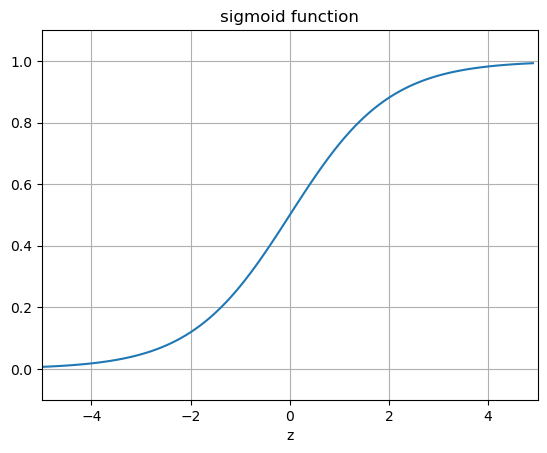

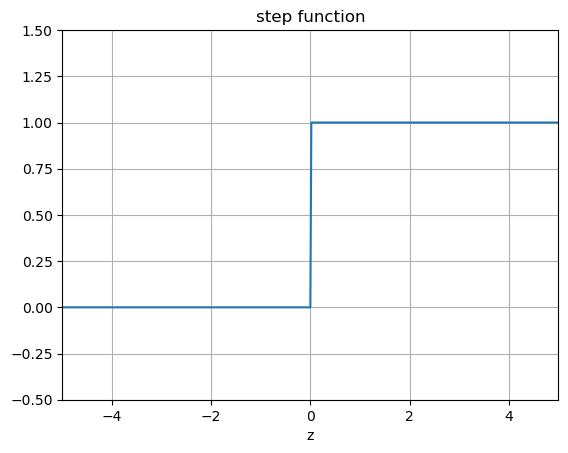

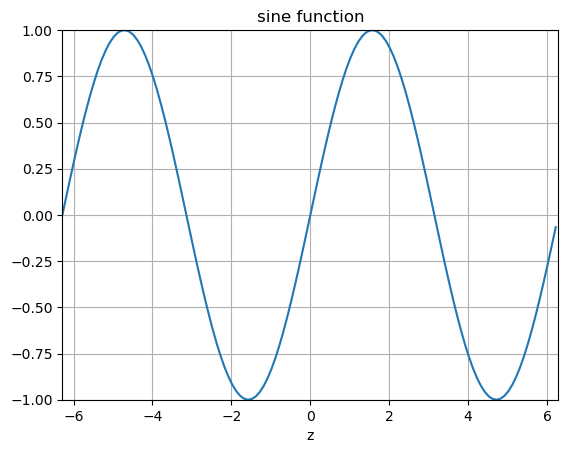

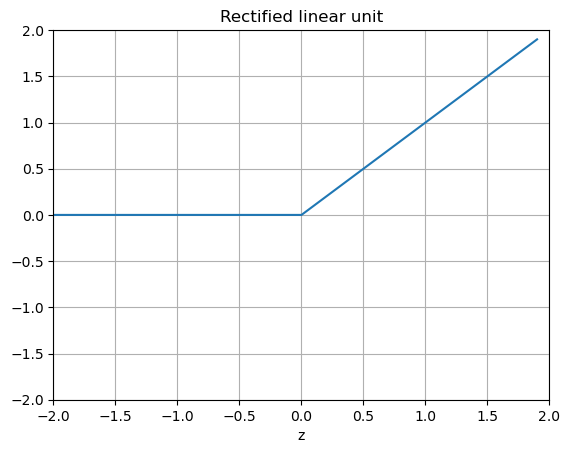

In [2]:
%matplotlib inline

"""The sigmoid function (or the logistic curve) is a 
function that takes any real number, z, and outputs a number (0,1).
It is useful in neural networks for assigning weights on a relative scale.
The value z is the weighted sum of parameters involved in the learning algorithm."""

import numpy
import matplotlib.pyplot as plt
import math as mt

z = numpy.arange(-5, 5, .1)
sigma_fn = numpy.vectorize(lambda z: 1/(1+numpy.exp(-z)))
sigma = sigma_fn(z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, sigma)
ax.set_ylim([-0.1, 1.1])
ax.set_xlim([-5,5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('sigmoid function')

plt.show()

"""Step Function"""
z = numpy.arange(-5, 5, .02)
step_fn = numpy.vectorize(lambda z: 1.0 if z >= 0.0 else 0.0)
step = step_fn(z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, step)
ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-5,5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('step function')

plt.show()

"""Sine Function"""
z = numpy.arange(-2*mt.pi, 2*mt.pi, 0.1)
t = numpy.sin(z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, t)
ax.set_ylim([-1.0, 1.0])
ax.set_xlim([-2*mt.pi,2*mt.pi])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('sine function')

plt.show()

"""Plots a graph of the squashing function used by a rectified linear
unit"""
z = numpy.arange(-2, 2, .1)
zero = numpy.zeros(len(z))
y = numpy.max([zero, z], axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, y)
ax.set_ylim([-2.0, 2.0])
ax.set_xlim([-2.0, 2.0])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('Rectified linear unit')

plt.show()

## Vanishing gradients

The Back propagation algorithm we derived above works by going from
the output layer to the input layer, propagating the error gradient on
the way. Once the algorithm has computed the gradient of the cost
function with regards to each parameter in the network, it uses these
gradients to update each parameter with a Gradient Descent (GD) step.

Unfortunately for us, the gradients often get smaller and smaller as
the algorithm progresses down to the first hidden layers. As a result,
the GD update leaves the lower layer connection weights virtually
unchanged, and training never converges to a good solution. This is
known in the literature as **the vanishing gradients problem**.

## Exploding gradients

In other cases, the opposite can happen, namely the the gradients can
grow bigger and bigger. The result is that many of the layers get
large updates of the weights the algorithm diverges. This is the
**exploding gradients problem**, which is mostly encountered in
recurrent neural networks. More generally, deep neural networks suffer
from unstable gradients, different layers may learn at widely
different speeds

## Is the Logistic activation function (Sigmoid)  our choice?

Although this unfortunate behavior has been empirically observed for
quite a while (it was one of the reasons why deep neural networks were
mostly abandoned for a long time), it is only around 2010 that
significant progress was made in understanding it.

A paper titled [Understanding the Difficulty of Training Deep
Feedforward Neural Networks by Xavier Glorot and Yoshua Bengio](http://proceedings.mlr.press/v9/glorot10a.html) found that
the problems with the popular logistic
sigmoid activation function and the weight initialization technique
that was most popular at the time, namely random initialization using
a normal distribution with a mean of 0 and a standard deviation of
1.

## Logistic function as the root of problems

They showed that with this activation function and this
initialization scheme, the variance of the outputs of each layer is
much greater than the variance of its inputs. Going forward in the
network, the variance keeps increasing after each layer until the
activation function saturates at the top layers. This is actually made
worse by the fact that the logistic function has a mean of 0.5, not 0
(the hyperbolic tangent function has a mean of 0 and behaves slightly
better than the logistic function in deep networks).

## The derivative of the Logistic funtion

Looking at the logistic activation function, when inputs become large
(negative or positive), the function saturates at 0 or 1, with a
derivative extremely close to 0. Thus when backpropagation kicks in,
it has virtually no gradient to propagate back through the network,
and what little gradient exists keeps getting diluted as
backpropagation progresses down through the top layers, so there is
really nothing left for the lower layers.

In their paper, Glorot and Bengio propose a way to significantly
alleviate this problem. We need the signal to flow properly in both
directions: in the forward direction when making predictions, and in
the reverse direction when backpropagating gradients. We don’t want
the signal to die out, nor do we want it to explode and saturate. For
the signal to flow properly, the authors argue that we need the
variance of the outputs of each layer to be equal to the variance of
its inputs, and we also need the gradients to have equal variance
before and after flowing through a layer in the reverse direction.

## Insights from the paper by Glorot and Bengio

One of the insights in the 2010 paper by Glorot and Bengio was that
the vanishing/exploding gradients problems were in part due to a poor
choice of activation function. Until then most people had assumed that
if Nature had chosen to use roughly sigmoid activation functions in
biological neurons, they must be an excellent choice. But it turns out
that other activation functions behave much better in deep neural
networks, in particular the ReLU activation function, mostly because
it does not saturate for positive values (and also because it is quite
fast to compute).

## The RELU function family

The ReLU activation function suffers from a problem known as the dying
ReLUs: during training, some neurons effectively die, meaning they
stop outputting anything other than 0.

In some cases, you may find that half of your network’s neurons are
dead, especially if you used a large learning rate. During training,
if a neuron’s weights get updated such that the weighted sum of the
neuron’s inputs is negative, it will start outputting 0. When this
happen, the neuron is unlikely to come back to life since the gradient
of the ReLU function is 0 when its input is negative.

## ELU function

To solve this problem, nowadays practitioners use a variant of the
ReLU function, such as the leaky ReLU discussed above or the so-called
exponential linear unit (ELU) function

$$
ELU(z) = \left\{\begin{array}{cc} \alpha\left( \exp{(z)}-1\right) & z < 0,\\  z & z \ge 0.\end{array}\right.
$$

## Which activation function should we use?

In general it seems that the ELU activation function is better than
the leaky ReLU function (and its variants), which is better than
ReLU. ReLU performs better than $\tanh$ which in turn performs better
than the logistic function.

If runtime performance is an issue, then you may opt for the leaky
ReLU function over the ELU function If you don’t want to tweak yet
another hyperparameter, you may just use the default $\alpha$ of
$0.01$ for the leaky ReLU, and $1$ for ELU. If you have spare time and
computing power, you can use cross-validation or bootstrap to evaluate
other activation functions.

## More on activation functions, output layers

In most cases you can use the ReLU activation function in the hidden
layers (or one of its variants).

It is a bit faster to compute than other activation functions, and the
gradient descent optimization does in general not get stuck.

**For the output layer:**

* For classification the softmax activation function is generally a good choice for classification tasks (when the classes are mutually exclusive).

* For regression tasks, you can simply use no activation function at all.

## Fine-tuning neural network hyperparameters

The flexibility of neural networks is also one of their main
drawbacks: there are many hyperparameters to tweak. Not only can you
use any imaginable network topology (how neurons/nodes are
interconnected), but even in a simple FFNN you can change the number
of layers, the number of neurons per layer, the type of activation
function to use in each layer, the weight initialization logic, the
stochastic gradient optmized and much more. How do you know what
combination of hyperparameters is the best for your task?

* You can use grid search with cross-validation to find the right hyperparameters.

However,since there are many hyperparameters to tune, and since
training a neural network on a large dataset takes a lot of time, you
will only be able to explore a tiny part of the hyperparameter space.

* You can use randomized search.

* Or use tools like [Oscar](http://oscar.calldesk.ai/), which implements more complex algorithms to help you find a good set of hyperparameters quickly.

## Hidden layers

For many problems you can start with just one or two hidden layers and
it will work just fine.  For the MNIST data set discussed below you can easily get a
high accuracy using just one hidden layer with a few hundred neurons.
You can reach for this data set above 98% accuracy using two hidden
layers with the same total amount of neurons, in roughly the same
amount of training time.

For more complex problems, you can gradually ramp up the number of
hidden layers, until you start overfitting the training set. Very
complex tasks, such as large image classification or speech
recognition, typically require networks with dozens of layers and they
need a huge amount of training data. However, you will rarely have to
train such networks from scratch: it is much more common to reuse
parts of a pretrained state-of-the-art network that performs a similar
task.

## Batch Normalization

Batch Normalization aims to address the vanishing/exploding gradients
problems, and more generally the problem that the distribution of each
layer’s inputs changes during training, as the parameters of the
previous layers change.

The technique consists of adding an operation in the model just before
the activation function of each layer, simply zero-centering and
normalizing the inputs, then scaling and shifting the result using two
new parameters per layer (one for scaling, the other for shifting). In
other words, this operation lets the model learn the optimal scale and
mean of the inputs for each layer.  In order to zero-center and
normalize the inputs, the algorithm needs to estimate the inputs’ mean
and standard deviation. It does so by evaluating the mean and standard
deviation of the inputs over the current mini-batch, from this the
name batch normalization.

## Dropout

It is a fairly simple algorithm: at every training step, every neuron
(including the input neurons but excluding the output neurons) has a
probability $p$ of being temporarily dropped out, meaning it will be
entirely ignored during this training step, but it may be active
during the next step.

The hyperparameter $p$ is called the dropout rate, and it is typically
set to 50%. After training, the neurons are not dropped anymore.  It
is viewed as one of the most popular regularization techniques.

## Gradient Clipping

A popular technique to lessen the exploding gradients problem is to
simply clip the gradients during backpropagation so that they never
exceed some threshold (this is mostly useful for recurrent neural
networks).

This technique is called Gradient Clipping.

In general however, Batch
Normalization is preferred.

## A top-down perspective on Neural networks

The first thing we would like to do is divide the data into two or
three parts. A training set, a validation or dev (development) set,
and a test set. The test set is the data on which we want to make
predictions. The dev set is a subset of the training data we use to
check how well we are doing out-of-sample, after training the model on
the training dataset. We use the validation error as a proxy for the
test error in order to make tweaks to our model. It is crucial that we
do not use any of the test data to train the algorithm. This is a
cardinal sin in ML. Then:

1. Estimate optimal error rate

2. Minimize underfitting (bias) on training data set.

3. Make sure you are not overfitting.

## More top-down perspectives

If the validation and test sets are drawn from the same distributions,
then a good performance on the validation set should lead to similarly
good performance on the test set. 

However, sometimes
the training data and test data differ in subtle ways because, for
example, they are collected using slightly different methods, or
because it is cheaper to collect data in one way versus another. In
this case, there can be a mismatch between the training and test
data. This can lead to the neural network overfitting these small
differences between the test and training sets, and a poor performance
on the test set despite having a good performance on the validation
set. To rectify this, Andrew Ng suggests making two validation or dev
sets, one constructed from the training data and one constructed from
the test data. The difference between the performance of the algorithm
on these two validation sets quantifies the train-test mismatch. This
can serve as another important diagnostic when using DNNs for
supervised learning.

## Limitations of supervised learning with deep networks

Like all statistical methods, supervised learning using neural
networks has important limitations. This is especially important when
one seeks to apply these methods, especially to physics problems. Like
all tools, DNNs are not a universal solution. Often, the same or
better performance on a task can be achieved by using a few
hand-engineered features (or even a collection of random
features).

## Limitations of NNs

Here we list some of the important limitations of supervised neural network based models. 

* **Need labeled data**. All supervised learning methods, DNNs for supervised learning require labeled data. Often, labeled data is harder to acquire than unlabeled data (e.g. one must pay for human experts to label images).

* **Supervised neural networks are extremely data intensive.** DNNs are data hungry. They perform best when data is plentiful. This is doubly so for supervised methods where the data must also be labeled. The utility of DNNs is extremely limited if data is hard to acquire or the datasets are small (hundreds to a few thousand samples). In this case, the performance of other methods that utilize hand-engineered features can exceed that of DNNs.

## Homogeneous data

* **Homogeneous data.** Almost all DNNs deal with homogeneous data of one type. It is very hard to design architectures that mix and match data types (i.e. some continuous variables, some discrete variables, some time series). In applications beyond images, video, and language, this is often what is required. In contrast, ensemble models like random forests or gradient-boosted trees have no difficulty handling mixed data types.

## More limitations

* **Many problems are not about prediction.** In natural science we are often interested in learning something about the underlying distribution that generates the data. In this case, it is often difficult to cast these ideas in a supervised learning setting. While the problems are related, it is possible to make good predictions with a *wrong* model. The model might or might not be useful for understanding the underlying science.

Some of these remarks are particular to DNNs, others are shared by all supervised learning methods. This motivates the use of unsupervised methods which in part circumvent these problems.

## Setting up a Multi-layer perceptron model for classification

We are now gong to develop an example based on the MNIST data
base. This is a classification problem and we need to use our
cross-entropy function we discussed in connection with logistic
regression. The cross-entropy defines our cost function for the
classificaton problems with neural networks.

In binary classification with two classes $(0, 1)$ we define the
logistic/sigmoid function as the probability that a particular input
is in class $0$ or $1$.  This is possible because the logistic
function takes any input from the real numbers and inputs a number
between 0 and 1, and can therefore be interpreted as a probability. It
also has other nice properties, such as a derivative that is simple to
calculate.

For an input $\boldsymbol{a}$ from the hidden layer, the probability that the input $\boldsymbol{x}$
is in class 0 or 1 is just. We let $\theta$ represent the unknown weights and biases to be adjusted by our equations). The variable $x$
represents our activation values $z$. We have

$$
P(y = 0 \mid \boldsymbol{x}, \boldsymbol{\theta}) = \frac{1}{1 + \exp{(- \boldsymbol{x}})} ,
$$

and

$$
P(y = 1 \mid \boldsymbol{x}, \boldsymbol{\theta}) = 1 - P(y = 0 \mid \boldsymbol{x}, \boldsymbol{\theta}) ,
$$

where $y \in \{0, 1\}$  and $\boldsymbol{\theta}$ represents the weights and biases
of our network.

## Defining the cost function

Our cost function is given as (see the Logistic regression lectures)

$$
\mathcal{C}(\boldsymbol{\theta}) = - \ln P(\mathcal{D} \mid \boldsymbol{\theta}) = - \sum_{i=1}^n
y_i \ln[P(y_i = 0)] + (1 - y_i) \ln [1 - P(y_i = 0)] = \sum_{i=1}^n \mathcal{L}_i(\boldsymbol{\theta}) .
$$

This last equality means that we can interpret our *cost* function as a sum over the *loss* function
for each point in the dataset $\mathcal{L}_i(\boldsymbol{\theta})$.  
The negative sign is just so that we can think about our algorithm as minimizing a positive number, rather
than maximizing a negative number.  

In *multiclass* classification it is common to treat each integer label as a so called *one-hot* vector:  

$y = 5 \quad \rightarrow \quad \boldsymbol{y} = (0, 0, 0, 0, 0, 1, 0, 0, 0, 0) ,$ and

$y = 1 \quad \rightarrow \quad \boldsymbol{y} = (0, 1, 0, 0, 0, 0, 0, 0, 0, 0) ,$ 

i.e. a binary bit string of length $C$, where $C = 10$ is the number of classes in the MNIST dataset (numbers from $0$ to $9$)..  

If $\boldsymbol{x}_i$ is the $i$-th input (image), $y_{ic}$ refers to the $c$-th component of the $i$-th
output vector $\boldsymbol{y}_i$.  
The probability of $\boldsymbol{x}_i$ being in class $c$ will be given by the softmax function:

$$
P(y_{ic} = 1 \mid \boldsymbol{x}_i, \boldsymbol{\theta}) = \frac{\exp{((\boldsymbol{a}_i^{hidden})^T \boldsymbol{w}_c)}}
{\sum_{c'=0}^{C-1} \exp{((\boldsymbol{a}_i^{hidden})^T \boldsymbol{w}_{c'})}} ,
$$

which reduces to the logistic function in the binary case.  
The likelihood of this $C$-class classifier
is now given as:

$$
P(\mathcal{D} \mid \boldsymbol{\theta}) = \prod_{i=1}^n \prod_{c=0}^{C-1} [P(y_{ic} = 1)]^{y_{ic}} .
$$

Again we take the negative log-likelihood to define our cost function:

$$
\mathcal{C}(\boldsymbol{\theta}) = - \log{P(\mathcal{D} \mid \boldsymbol{\theta})}.
$$

See the logistic regression lectures for a full definition of the cost function.

The back propagation equations need now only a small change, namely the definition of a new cost function. We are thus ready to use the same equations as before!

## Example: binary classification problem

As an example of the above, relevant for project 2 as well, let us consider a binary class. As discussed in our logistic regression lectures, we defined a cost function in terms of the parameters $\beta$ as

$$
\mathcal{C}(\boldsymbol{\beta}) = - \sum_{i=1}^n \left(y_i\log{p(y_i \vert x_i,\boldsymbol{\beta})}+(1-y_i)\log{1-p(y_i \vert x_i,\boldsymbol{\beta})}\right),
$$

where we had defined the logistic (sigmoid) function

$$
p(y_i =1\vert x_i,\boldsymbol{\beta})=\frac{\exp{(\beta_0+\beta_1 x_i)}}{1+\exp{(\beta_0+\beta_1 x_i)}},
$$

and

$$
p(y_i =0\vert x_i,\boldsymbol{\beta})=1-p(y_i =1\vert x_i,\boldsymbol{\beta}).
$$

The parameters $\boldsymbol{\beta}$ were defined using a minimization method like gradient descent or Newton-Raphson's method. 

Now we replace $x_i$ with the activation $z_i^l$ for a given layer $l$ and the outputs as $y_i=a_i^l=f(z_i^l)$, with $z_i^l$ now being a function of the weights $w_{ij}^l$ and biases $b_i^l$. 
We have then

$$
a_i^l = y_i = \frac{\exp{(z_i^l)}}{1+\exp{(z_i^l)}},
$$

with

$$
z_i^l = \sum_{j}w_{ij}^l a_j^{l-1}+b_i^l,
$$

where the superscript $l-1$ indicates that these are the outputs from layer $l-1$.
Our cost function at the final layer $l=L$ is now

$$
\mathcal{C}(\boldsymbol{W}) = - \sum_{i=1}^n \left(t_i\log{a_i^L}+(1-t_i)\log{(1-a_i^L)}\right),
$$

where we have defined the targets $t_i$. The derivatives of the cost function with respect to the output $a_i^L$ are then easily calculated and we get

$$
\frac{\partial \mathcal{C}(\boldsymbol{W})}{\partial a_i^L} = \frac{a_i^L-t_i}{a_i^L(1-a_i^L)}.
$$

In case we use another activation function than the logistic one, we need to evaluate other derivatives.

## The Softmax function
In case we employ the more general case given by the Softmax equation, we need to evaluate the derivative of the activation function with respect to the activation $z_i^l$, that is we need

$$
\frac{\partial f(z_i^l)}{\partial w_{jk}^l} =
\frac{\partial f(z_i^l)}{\partial z_j^l} \frac{\partial z_j^l}{\partial w_{jk}^l}= \frac{\partial f(z_i^l)}{\partial z_j^l}a_k^{l-1}.
$$

For the Softmax function we have

$$
f(z_i^l) = \frac{\exp{(z_i^l)}}{\sum_{m=1}^K\exp{(z_m^l)}}.
$$

Its derivative with respect to $z_j^l$ gives

$$
\frac{\partial f(z_i^l)}{\partial z_j^l}= f(z_i^l)\left(\delta_{ij}-f(z_j^l)\right),
$$

which in case of the simply binary model reduces to  having $i=j$.

## Developing a code for doing neural networks with back propagation

One can identify a set of key steps when using neural networks to solve supervised learning problems:  

1. Collect and pre-process data  

2. Define model and architecture  

3. Choose cost function and optimizer  

4. Train the model  

5. Evaluate model performance on test data  

6. Adjust hyperparameters (if necessary, network architecture)

## Collect and pre-process data

Here we will be using the MNIST dataset, which is readily available through the **scikit-learn**
package. You may also find it for example [here](http://yann.lecun.com/exdb/mnist/).  
The *MNIST* (Modified National Institute of Standards and Technology) database is a large database
of handwritten digits that is commonly used for training various image processing systems.  
The MNIST dataset consists of 70 000 images of size $28\times 28$ pixels, each labeled from 0 to 9.  
The scikit-learn dataset we will use consists of a selection of 1797 images of size $8\times 8$ collected and processed from this database.  

To feed data into a feed-forward neural network we need to represent
the inputs as a design/feature matrix $X = (n_{inputs}, n_{features})$.  Each
row represents an *input*, in this case a handwritten digit, and
each column represents a *feature*, in this case a pixel.  The
correct answers, also known as *labels* or *targets* are
represented as a 1D array of integers 
$Y = (n_{inputs}) = (5, 3, 1, 8,...)$.

As an example, say we want to build a neural network using supervised learning to predict Body-Mass Index (BMI) from
measurements of height (in m)  
and weight (in kg). If we have measurements of 5 people the design/feature matrix could be for example:  

$$ X = \begin{bmatrix}
1.85 & 81\\
1.71 & 65\\
1.95 & 103\\
1.55 & 42\\
1.63 & 56
\end{bmatrix} ,$$  

and the targets would be:  

$$ Y = (23.7, 22.2, 27.1, 17.5, 21.1) $$  

Since each input image is a 2D matrix, we need to flatten the image
(i.e. "unravel" the 2D matrix into a 1D array) to turn the data into a
design/feature matrix. This means we lose all spatial information in the
image, such as locality and translational invariance. More complicated
architectures such as Convolutional Neural Networks can take advantage
of such information, and are most commonly applied when analyzing
images.

inputs = (n_inputs, pixel_width, pixel_height) = (1797, 8, 8)
labels = (n_inputs) = (1797,)
X = (n_inputs, n_features) = (1797, 64)


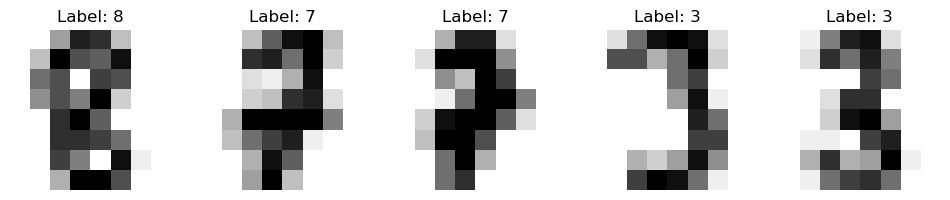

In [3]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


# ensure the same random numbers appear every time
np.random.seed(0)

# display images in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)


# download MNIST dataset
digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

print("inputs = (n_inputs, pixel_width, pixel_height) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# flatten the image
# the value -1 means dimension is inferred from the remaining dimensions: 8x8 = 64
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
print("X = (n_inputs, n_features) = " + str(inputs.shape))


# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()

## Train and test datasets

Performing analysis before partitioning the dataset is a major error, that can lead to incorrect conclusions.  

We will reserve $80 \%$ of our dataset for training and $20 \%$ for testing.  

It is important that the train and test datasets are drawn randomly from our dataset, to ensure
no bias in the sampling.  
Say you are taking measurements of weather data to predict the weather in the coming 5 days.
You don't want to train your model on measurements taken from the hours 00.00 to 12.00, and then test it on data
collected from 12.00 to 24.00.

In [4]:
from sklearn.model_selection import train_test_split

# one-liner from scikit-learn library
train_size = 0.8
test_size = 1 - train_size
X_train, X_test, Y_train, Y_test = train_test_split(inputs, labels, train_size=train_size,
                                                    test_size=test_size)

# equivalently in numpy
def train_test_split_numpy(inputs, labels, train_size, test_size):
    n_inputs = len(inputs)
    inputs_shuffled = inputs.copy()
    labels_shuffled = labels.copy()
    
    np.random.shuffle(inputs_shuffled)
    np.random.shuffle(labels_shuffled)
    
    train_end = int(n_inputs*train_size)
    X_train, X_test = inputs_shuffled[:train_end], inputs_shuffled[train_end:]
    Y_train, Y_test = labels_shuffled[:train_end], labels_shuffled[train_end:]
    
    return X_train, X_test, Y_train, Y_test

#X_train, X_test, Y_train, Y_test = train_test_split_numpy(inputs, labels, train_size, test_size)

print("Number of training images: " + str(len(X_train)))
print("Number of test images: " + str(len(X_test)))

Number of training images: 1437
Number of test images: 360


## Define model and architecture

Our simple feed-forward neural network will consist of an *input* layer, a single *hidden* layer and an *output* layer. The activation $y$ of each neuron is a weighted sum of inputs, passed through an activation function. In case of the simple perceptron model we have 

$$ z = \sum_{i=1}^n w_i a_i ,$$

$$ y = f(z) ,$$

where $f$ is the activation function, $a_i$ represents input from neuron $i$ in the preceding layer
and $w_i$ is the weight to input $i$.  
The activation of the neurons in the input layer is just the features (e.g. a pixel value).  

The simplest activation function for a neuron is the *Heaviside* function:

$$ f(z) = 
\begin{cases}
1,  &  z > 0\\
0,  & \text{otherwise}
\end{cases}
$$

A feed-forward neural network with this activation is known as a *perceptron*.  
For a binary classifier (i.e. two classes, 0 or 1, dog or not-dog) we can also use this in our output layer.  
This activation can be generalized to $k$ classes (using e.g. the *one-against-all* strategy), 
and we call these architectures *multiclass perceptrons*.  

However, it is now common to use the terms Single Layer Perceptron (SLP) (1 hidden layer) and  
Multilayer Perceptron (MLP) (2 or more hidden layers) to refer to feed-forward neural networks with any activation function.  

Typical choices for activation functions include the sigmoid function, hyperbolic tangent, and Rectified Linear Unit (ReLU).  
We will be using the sigmoid function $\sigma(x)$:  

$$ f(x) = \sigma(x) = \frac{1}{1 + e^{-x}} ,$$

which is inspired by probability theory (see logistic regression) and was most commonly used until about 2011. See the discussion below concerning other activation functions.

## Layers

* Input 

Since each input image has 8x8 = 64 pixels or features, we have an input layer of 64 neurons.  

* Hidden layer

We will use 50 neurons in the hidden layer receiving input from the neurons in the input layer.  
Since each neuron in the hidden layer is connected to the 64 inputs we have 64x50 = 3200 weights to the hidden layer.  

* Output

If we were building a binary classifier, it would be sufficient with a single neuron in the output layer,
which could output 0 or 1 according to the Heaviside function. This would be an example of a *hard* classifier, meaning it outputs the class of the input directly. However, if we are dealing with noisy data it is often beneficial to use a *soft* classifier, which outputs the probability of being in class 0 or 1.  

For a soft binary classifier, we could use a single neuron and interpret the output as either being the probability of being in class 0 or the probability of being in class 1. Alternatively we could use 2 neurons, and interpret each neuron as the probability of being in each class.  

Since we are doing multiclass classification, with 10 categories, it is natural to use 10 neurons in the output layer. We number the neurons $j = 0,1,...,9$. The activation of each output neuron $j$ will be according to the *softmax* function:  

$$ P(\text{class $j$} \mid \text{input $\boldsymbol{a}$}) = \frac{\exp{(\boldsymbol{a}^T \boldsymbol{w}_j)}}
{\sum_{c=0}^{9} \exp{(\boldsymbol{a}^T \boldsymbol{w}_c)}} ,$$  

i.e. each neuron $j$ outputs the probability of being in class $j$ given an input from the hidden layer $\boldsymbol{a}$, with $\boldsymbol{w}_j$ the weights of neuron $j$ to the inputs.  
The denominator is a normalization factor to ensure the outputs (probabilities) sum up to 1.  
The exponent is just the weighted sum of inputs as before:  

$$ z_j = \sum_{i=1}^n w_ {ij} a_i+b_j.$$  

Since each neuron in the output layer is connected to the 50 inputs from the hidden layer we have 50x10 = 500
weights to the output layer.

## Weights and biases

Typically weights are initialized with small values distributed around zero, drawn from a uniform
or normal distribution. Setting all weights to zero means all neurons give the same output, making the network useless.  

Adding a bias value to the weighted sum of inputs allows the neural network to represent a greater range
of values. Without it, any input with the value 0 will be mapped to zero (before being passed through the activation). The bias unit has an output of 1, and a weight to each neuron $j$, $b_j$:  

$$ z_j = \sum_{i=1}^n w_ {ij} a_i + b_j.$$  

The bias weights $\boldsymbol{b}$ are often initialized to zero, but a small value like $0.01$ ensures all neurons have some output which can be backpropagated in the first training cycle.

In [5]:
# building our neural network

n_inputs, n_features = X_train.shape
n_hidden_neurons = 50
n_categories = 10

# we make the weights normally distributed using numpy.random.randn

# weights and bias in the hidden layer
hidden_weights = np.random.randn(n_features, n_hidden_neurons)
hidden_bias = np.zeros(n_hidden_neurons) + 0.01

# weights and bias in the output layer
output_weights = np.random.randn(n_hidden_neurons, n_categories)
output_bias = np.zeros(n_categories) + 0.01

## Feed-forward pass

Denote $F$ the number of features, $H$ the number of hidden neurons and $C$ the number of categories.  
For each input image we calculate a weighted sum of input features (pixel values) to each neuron $j$ in the hidden layer $l$:  

$$ z_{j}^{l} = \sum_{i=1}^{F} w_{ij}^{l} x_i + b_{j}^{l},$$

this is then passed through our activation function  

$$ a_{j}^{l} = f(z_{j}^{l}) .$$  

We calculate a weighted sum of inputs (activations in the hidden layer) to each neuron $j$ in the output layer:  

$$ z_{j}^{L} = \sum_{i=1}^{H} w_{ij}^{L} a_{i}^{l} + b_{j}^{L}.$$  

Finally we calculate the output of neuron $j$ in the output layer using the softmax function:  

$$ a_{j}^{L} = \frac{\exp{(z_j^{L})}}
{\sum_{c=0}^{C-1} \exp{(z_c^{L})}} .$$

## Matrix multiplications

Since our data has the dimensions $X = (n_{inputs}, n_{features})$ and our weights to the hidden
layer have the dimensions  
$W_{hidden} = (n_{features}, n_{hidden})$,
we can easily feed the network all our training data in one go by taking the matrix product  

$$ X W^{h} = (n_{inputs}, n_{hidden}),$$ 

and obtain a matrix that holds the weighted sum of inputs to the hidden layer
for each input image and each hidden neuron.    
We also add the bias to obtain a matrix of weighted sums to the hidden layer $Z^{h}$:  

$$ \boldsymbol{z}^{l} = \boldsymbol{X} \boldsymbol{W}^{l} + \boldsymbol{b}^{l} ,$$

meaning the same bias (1D array with size equal number of hidden neurons) is added to each input image.  
This is then passed through the activation:  

$$ \boldsymbol{a}^{l} = f(\boldsymbol{z}^l) .$$  

This is fed to the output layer:  

$$ \boldsymbol{z}^{L} = \boldsymbol{a}^{L} \boldsymbol{W}^{L} + \boldsymbol{b}^{L} .$$

Finally we receive our output values for each image and each category by passing it through the softmax function:  

$$ output = softmax (\boldsymbol{z}^{L}) = (n_{inputs}, n_{categories}) .$$

In [6]:
# setup the feed-forward pass, subscript h = hidden layer

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def feed_forward(X):
    # weighted sum of inputs to the hidden layer
    z_h = np.matmul(X, hidden_weights) + hidden_bias
    # activation in the hidden layer
    a_h = sigmoid(z_h)
    
    # weighted sum of inputs to the output layer
    z_o = np.matmul(a_h, output_weights) + output_bias
    # softmax output
    # axis 0 holds each input and axis 1 the probabilities of each category
    exp_term = np.exp(z_o)
    probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)
    
    return probabilities

probabilities = feed_forward(X_train)
print("probabilities = (n_inputs, n_categories) = " + str(probabilities.shape))
print("probability that image 0 is in category 0,1,2,...,9 = \n" + str(probabilities[0]))
print("probabilities sum up to: " + str(probabilities[0].sum()))
print()

# we obtain a prediction by taking the class with the highest likelihood
def predict(X):
    probabilities = feed_forward(X)
    return np.argmax(probabilities, axis=1)

predictions = predict(X_train)
print("predictions = (n_inputs) = " + str(predictions.shape))
print("prediction for image 0: " + str(predictions[0]))
print("correct label for image 0: " + str(Y_train[0]))

probabilities = (n_inputs, n_categories) = (1437, 10)
probability that image 0 is in category 0,1,2,...,9 = 
[5.41511965e-04 2.17174962e-03 8.84355903e-03 1.44970586e-03
 1.10378326e-04 5.08318298e-09 2.03256632e-04 1.92507116e-03
 9.84443254e-01 3.11507992e-04]
probabilities sum up to: 1.0

predictions = (n_inputs) = (1437,)
prediction for image 0: 8
correct label for image 0: 6


## Choose cost function and optimizer

To measure how well our neural network is doing we need to introduce a cost function.  
We will call the function that gives the error of a single sample output the *loss* function, and the function
that gives the total error of our network across all samples the *cost* function.
A typical choice for multiclass classification is the *cross-entropy* loss, also known as the negative log likelihood.  

In *multiclass* classification it is common to treat each integer label as a so called *one-hot* vector:  

$$ y = 5 \quad \rightarrow \quad \boldsymbol{y} = (0, 0, 0, 0, 0, 1, 0, 0, 0, 0) ,$$  

$$ y = 1 \quad \rightarrow \quad \boldsymbol{y} = (0, 1, 0, 0, 0, 0, 0, 0, 0, 0) ,$$  

i.e. a binary bit string of length $C$, where $C = 10$ is the number of classes in the MNIST dataset.  

Let $y_{ic}$ denote the $c$-th component of the $i$-th one-hot vector.  
We define the cost function $\mathcal{C}$ as a sum over the cross-entropy loss for each point $\boldsymbol{x}_i$ in the dataset.

In the one-hot representation only one of the terms in the loss function is non-zero, namely the
probability of the correct category $c'$  
(i.e. the category $c'$ such that $y_{ic'} = 1$). This means that the cross entropy loss only punishes you for how wrong
you got the correct label. The probability of category $c$ is given by the softmax function. The vector $\boldsymbol{\theta}$ represents the parameters of our network, i.e. all the weights and biases.

## Optimizing the cost function

The network is trained by finding the weights and biases that minimize the cost function. One of the most widely used classes of methods is *gradient descent* and its generalizations. The idea behind gradient descent
is simply to adjust the weights in the direction where the gradient of the cost function is large and negative. This ensures we flow toward a *local* minimum of the cost function.  
Each parameter $\theta$ is iteratively adjusted according to the rule  

$$ \theta_{i+1} = \theta_i - \eta \nabla \mathcal{C}(\theta_i) ,$$

where $\eta$ is known as the *learning rate*, which controls how big a step we take towards the minimum.  
This update can be repeated for any number of iterations, or until we are satisfied with the result.  

A simple and effective improvement is a variant called *Batch Gradient Descent*.  
Instead of calculating the gradient on the whole dataset, we calculate an approximation of the gradient
on a subset of the data called a *minibatch*.  
If there are $N$ data points and we have a minibatch size of $M$, the total number of batches
is $N/M$.  
We denote each minibatch $B_k$, with $k = 1, 2,...,N/M$. The gradient then becomes:  

$$ \nabla \mathcal{C}(\theta) = \frac{1}{N} \sum_{i=1}^N \nabla \mathcal{L}_i(\theta) \quad \rightarrow \quad
\frac{1}{M} \sum_{i \in B_k} \nabla \mathcal{L}_i(\theta) ,$$

i.e. instead of averaging the loss over the entire dataset, we average over a minibatch.  

This has two important benefits:  
1. Introducing stochasticity decreases the chance that the algorithm becomes stuck in a local minima.  

2. It significantly speeds up the calculation, since we do not have to use the entire dataset to calculate the gradient.  

The various optmization  methods, with codes and algorithms,  are discussed in our lectures on [Gradient descent approaches](https://compphysics.github.io/MachineLearning/doc/pub/Splines/html/Splines-bs.html).

## Regularization

It is common to add an extra term to the cost function, proportional
to the size of the weights.  This is equivalent to constraining the
size of the weights, so that they do not grow out of control.
Constraining the size of the weights means that the weights cannot
grow arbitrarily large to fit the training data, and in this way
reduces *overfitting*.

We will measure the size of the weights using the so called *L2-norm*, meaning our cost function becomes:  

$$  \mathcal{C}(\theta) = \frac{1}{N} \sum_{i=1}^N \mathcal{L}_i(\theta) \quad \rightarrow \quad
\frac{1}{N} \sum_{i=1}^N  \mathcal{L}_i(\theta) + \lambda \lvert \lvert \boldsymbol{w} \rvert \rvert_2^2 
= \frac{1}{N} \sum_{i=1}^N  \mathcal{L}(\theta) + \lambda \sum_{ij} w_{ij}^2,$$  

i.e. we sum up all the weights squared. The factor $\lambda$ is known as a regularization parameter.

In order to train the model, we need to calculate the derivative of
the cost function with respect to every bias and weight in the
network.  In total our network has $(64 + 1)\times 50=3250$ weights in
the hidden layer and $(50 + 1)\times 10=510$ weights to the output
layer ($+1$ for the bias), and the gradient must be calculated for
every parameter.  We use the *backpropagation* algorithm discussed
above. This is a clever use of the chain rule that allows us to
calculate the gradient efficently.

## Matrix  multiplication

To more efficently train our network these equations are implemented using matrix operations.  
The error in the output layer is calculated simply as, with $\boldsymbol{t}$ being our targets,  

$$ \delta_L = \boldsymbol{t} - \boldsymbol{y} = (n_{inputs}, n_{categories}) .$$  

The gradient for the output weights is calculated as  

$$ \nabla W_{L} = \boldsymbol{a}^T \delta_L   = (n_{hidden}, n_{categories}) ,$$

where $\boldsymbol{a} = (n_{inputs}, n_{hidden})$. This simply means that we are summing up the gradients for each input.  
Since we are going backwards we have to transpose the activation matrix.  

The gradient with respect to the output bias is then  

$$ \nabla \boldsymbol{b}_{L} = \sum_{i=1}^{n_{inputs}} \delta_L = (n_{categories}) .$$  

The error in the hidden layer is  

$$ \Delta_h = \delta_L W_{L}^T \circ f'(z_{h}) = \delta_L W_{L}^T \circ a_{h} \circ (1 - a_{h}) = (n_{inputs}, n_{hidden}) ,$$  

where $f'(a_{h})$ is the derivative of the activation in the hidden layer. The matrix products mean
that we are summing up the products for each neuron in the output layer. The symbol $\circ$ denotes
the *Hadamard product*, meaning element-wise multiplication.  

This again gives us the gradients in the hidden layer:  

$$ \nabla W_{h} = X^T \delta_h = (n_{features}, n_{hidden}) ,$$  

$$ \nabla b_{h} = \sum_{i=1}^{n_{inputs}} \delta_h = (n_{hidden}) .$$

In [7]:
# to categorical turns our integer vector into a onehot representation
from sklearn.metrics import accuracy_score

# one-hot in numpy
def to_categorical_numpy(integer_vector):
    n_inputs = len(integer_vector)
    n_categories = np.max(integer_vector) + 1
    onehot_vector = np.zeros((n_inputs, n_categories))
    onehot_vector[range(n_inputs), integer_vector] = 1
    
    return onehot_vector

#Y_train_onehot, Y_test_onehot = to_categorical(Y_train), to_categorical(Y_test)
Y_train_onehot, Y_test_onehot = to_categorical_numpy(Y_train), to_categorical_numpy(Y_test)

def feed_forward_train(X):
    # weighted sum of inputs to the hidden layer
    z_h = np.matmul(X, hidden_weights) + hidden_bias
    # activation in the hidden layer
    a_h = sigmoid(z_h)
    
    # weighted sum of inputs to the output layer
    z_o = np.matmul(a_h, output_weights) + output_bias
    # softmax output
    # axis 0 holds each input and axis 1 the probabilities of each category
    exp_term = np.exp(z_o)
    probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)
    
    # for backpropagation need activations in hidden and output layers
    return a_h, probabilities

def backpropagation(X, Y):
    a_h, probabilities = feed_forward_train(X)
    
    # error in the output layer
    error_output = probabilities - Y
    # error in the hidden layer
    error_hidden = np.matmul(error_output, output_weights.T) * a_h * (1 - a_h)
    
    # gradients for the output layer
    output_weights_gradient = np.matmul(a_h.T, error_output)
    output_bias_gradient = np.sum(error_output, axis=0)
    
    # gradient for the hidden layer
    hidden_weights_gradient = np.matmul(X.T, error_hidden)
    hidden_bias_gradient = np.sum(error_hidden, axis=0)

    return output_weights_gradient, output_bias_gradient, hidden_weights_gradient, hidden_bias_gradient

print("Old accuracy on training data: " + str(accuracy_score(predict(X_train), Y_train)))

eta = 0.01
lmbd = 0.01
for i in range(1000):
    # calculate gradients
    dWo, dBo, dWh, dBh = backpropagation(X_train, Y_train_onehot)
    
    # regularization term gradients
    dWo += lmbd * output_weights
    dWh += lmbd * hidden_weights
    
    # update weights and biases
    output_weights -= eta * dWo
    output_bias -= eta * dBo
    hidden_weights -= eta * dWh
    hidden_bias -= eta * dBh

print("New accuracy on training data: " + str(accuracy_score(predict(X_train), Y_train)))

Old accuracy on training data: 0.1440501043841336


/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


New accuracy on training data: 0.09951287404314545


## Improving performance

As we can see the network does not seem to be learning at all. It seems to be just guessing the label for each image.  
In order to obtain a network that does something useful, we will have to do a bit more work.  

The choice of *hyperparameters* such as learning rate and regularization parameter is hugely influential for the performance of the network. Typically a *grid-search* is performed, wherein we test different hyperparameters separated by orders of magnitude. For example we could test the learning rates $\eta = 10^{-6}, 10^{-5},...,10^{-1}$ with different regularization parameters $\lambda = 10^{-6},...,10^{-0}$.  

Next, we haven't implemented minibatching yet, which introduces stochasticity and is though to act as an important regularizer on the weights. We call a feed-forward + backward pass with a minibatch an *iteration*, and a full training period
going through the entire dataset ($n/M$ batches) an *epoch*.

If this does not improve network performance, you may want to consider altering the network architecture, adding more neurons or hidden layers.  
Andrew Ng goes through some of these considerations in this [video](https://youtu.be/F1ka6a13S9I). You can find a summary of the video [here](https://kevinzakka.github.io/2016/09/26/applying-deep-learning/).

## Full object-oriented implementation

It is very natural to think of the network as an object, with specific instances of the network
being realizations of this object with different hyperparameters. An implementation using Python classes provides a clean structure and interface, and the full implementation of our neural network is given below.

In [8]:
class NeuralNetwork:
    def __init__(
            self,
            X_data,
            Y_data,
            n_hidden_neurons=50,
            n_categories=10,
            epochs=10,
            batch_size=100,
            eta=0.1,
            lmbd=0.0):

        self.X_data_full = X_data
        self.Y_data_full = Y_data

        self.n_inputs = X_data.shape[0]
        self.n_features = X_data.shape[1]
        self.n_hidden_neurons = n_hidden_neurons
        self.n_categories = n_categories

        self.epochs = epochs
        self.batch_size = batch_size
        self.iterations = self.n_inputs // self.batch_size
        self.eta = eta
        self.lmbd = lmbd

        self.create_biases_and_weights()

    def create_biases_and_weights(self):
        self.hidden_weights = np.random.randn(self.n_features, self.n_hidden_neurons)
        self.hidden_bias = np.zeros(self.n_hidden_neurons) + 0.01

        self.output_weights = np.random.randn(self.n_hidden_neurons, self.n_categories)
        self.output_bias = np.zeros(self.n_categories) + 0.01

    def feed_forward(self):
        # feed-forward for training
        self.z_h = np.matmul(self.X_data, self.hidden_weights) + self.hidden_bias
        self.a_h = sigmoid(self.z_h)

        self.z_o = np.matmul(self.a_h, self.output_weights) + self.output_bias

        exp_term = np.exp(self.z_o)
        self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)

    def feed_forward_out(self, X):
        # feed-forward for output
        z_h = np.matmul(X, self.hidden_weights) + self.hidden_bias
        a_h = sigmoid(z_h)

        z_o = np.matmul(a_h, self.output_weights) + self.output_bias
        
        exp_term = np.exp(z_o)
        probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)
        return probabilities

    def backpropagation(self):
        error_output = self.probabilities - self.Y_data
        error_hidden = np.matmul(error_output, self.output_weights.T) * self.a_h * (1 - self.a_h)

        self.output_weights_gradient = np.matmul(self.a_h.T, error_output)
        self.output_bias_gradient = np.sum(error_output, axis=0)

        self.hidden_weights_gradient = np.matmul(self.X_data.T, error_hidden)
        self.hidden_bias_gradient = np.sum(error_hidden, axis=0)

        if self.lmbd > 0.0:
            self.output_weights_gradient += self.lmbd * self.output_weights
            self.hidden_weights_gradient += self.lmbd * self.hidden_weights

        self.output_weights -= self.eta * self.output_weights_gradient
        self.output_bias -= self.eta * self.output_bias_gradient
        self.hidden_weights -= self.eta * self.hidden_weights_gradient
        self.hidden_bias -= self.eta * self.hidden_bias_gradient

    def predict(self, X):
        probabilities = self.feed_forward_out(X)
        return np.argmax(probabilities, axis=1)

    def predict_probabilities(self, X):
        probabilities = self.feed_forward_out(X)
        return probabilities

    def train(self):
        data_indices = np.arange(self.n_inputs)

        for i in range(self.epochs):
            for j in range(self.iterations):
                # pick datapoints with replacement
                chosen_datapoints = np.random.choice(
                    data_indices, size=self.batch_size, replace=False
                )

                # minibatch training data
                self.X_data = self.X_data_full[chosen_datapoints]
                self.Y_data = self.Y_data_full[chosen_datapoints]

                self.feed_forward()
                self.backpropagation()

## Evaluate model performance on test data

To measure the performance of our network we evaluate how well it does it data it has never seen before, i.e. the test data.  
We measure the performance of the network using the *accuracy* score.  
The accuracy is as you would expect just the number of images correctly labeled divided by the total number of images. A perfect classifier will have an accuracy score of $1$.  

$$ \text{Accuracy} = \frac{\sum_{i=1}^n I(\tilde{y}_i = y_i)}{n} ,$$  

where $I$ is the indicator function, $1$ if $\tilde{y}_i = y_i$ and $0$ otherwise.

In [9]:
epochs = 100
batch_size = 100

dnn = NeuralNetwork(X_train, Y_train_onehot, eta=eta, lmbd=lmbd, epochs=epochs, batch_size=batch_size,
                    n_hidden_neurons=n_hidden_neurons, n_categories=n_categories)
dnn.train()
test_predict = dnn.predict(X_test)

# accuracy score from scikit library
print("Accuracy score on test set: ", accuracy_score(Y_test, test_predict))

# equivalent in numpy
def accuracy_score_numpy(Y_test, Y_pred):
    return np.sum(Y_test == Y_pred) / len(Y_test)

#print("Accuracy score on test set: ", accuracy_score_numpy(Y_test, test_predict))

Accuracy score on test set:  0.9444444444444444


## Adjust hyperparameters

We now perform a grid search to find the optimal hyperparameters for the network.  
Note that we are only using 1 layer with 50 neurons, and human performance is estimated to be around $98\%$ ($2\%$ error rate).

In [10]:
eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)
# store the models for later use
DNN_numpy = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)

# grid search
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        dnn = NeuralNetwork(X_train, Y_train_onehot, eta=eta, lmbd=lmbd, epochs=epochs, batch_size=batch_size,
                            n_hidden_neurons=n_hidden_neurons, n_categories=n_categories)
        dnn.train()
        
        DNN_numpy[i][j] = dnn
        
        test_predict = dnn.predict(X_test)
        
        print("Learning rate  = ", eta)
        print("Lambda = ", lmbd)
        print("Accuracy score on test set: ", accuracy_score(Y_test, test_predict))
        print()

Learning rate  =  1e-05
Lambda =  1e-05
Accuracy score on test set:  0.11666666666666667



Learning rate  =  1e-05
Lambda =  0.0001
Accuracy score on test set:  0.20833333333333334



Learning rate  =  1e-05
Lambda =  0.001
Accuracy score on test set:  0.12222222222222222



Learning rate  =  1e-05
Lambda =  0.01
Accuracy score on test set:  0.14722222222222223



Learning rate  =  1e-05
Lambda =  0.1
Accuracy score on test set:  0.17777777777777778



Learning rate  =  1e-05
Lambda =  1.0
Accuracy score on test set:  0.16111111111111112



Learning rate  =  1e-05
Lambda =  10.0
Accuracy score on test set:  0.20277777777777778



Learning rate  =  0.0001
Lambda =  1e-05
Accuracy score on test set:  0.5305555555555556



Learning rate  =  0.0001
Lambda =  0.0001
Accuracy score on test set:  0.5944444444444444



Learning rate  =  0.0001
Lambda =  0.001
Accuracy score on test set:  0.5888888888888889



Learning rate  =  0.0001
Lambda =  0.01
Accuracy score on test set:  0.6111111111111112



Learning rate  =  0.0001
Lambda =  0.1
Accuracy score on test set:  0.5222222222222223



Learning rate  =  0.0001
Lambda =  1.0
Accuracy score on test set:  0.5555555555555556



Learning rate  =  0.0001
Lambda =  10.0
Accuracy score on test set:  0.8055555555555556



Learning rate  =  0.001
Lambda =  1e-05
Accuracy score on test set:  0.85



Learning rate  =  0.001
Lambda =  0.0001
Accuracy score on test set:  0.85



Learning rate  =  0.001
Lambda =  0.001
Accuracy score on test set:  0.875



Learning rate  =  0.001
Lambda =  0.01
Accuracy score on test set:  0.8666666666666667



Learning rate  =  0.001
Lambda =  0.1
Accuracy score on test set:  0.8638888888888889



Learning rate  =  0.001
Lambda =  1.0
Accuracy score on test set:  0.9555555555555556



Learning rate  =  0.001
Lambda =  10.0
Accuracy score on test set:  0.925



Learning rate  =  0.01
Lambda =  1e-05
Accuracy score on test set:  0.9472222222222222



Learning rate  =  0.01
Lambda =  0.0001
Accuracy score on test set:  0.9277777777777778



Learning rate  =  0.01
Lambda =  0.001
Accuracy score on test set:  0.9472222222222222



Learning rate  =  0.01
Lambda =  0.01
Accuracy score on test set:  0.9305555555555556



Learning rate  =  0.01
Lambda =  0.1
Accuracy score on test set:  0.9555555555555556



Learning rate  =  0.01
Lambda =  1.0
Accuracy score on test set:  0.7694444444444445



Learning rate  =  0.01
Lambda =  10.0
Accuracy score on test set:  0.19166666666666668



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


Learning rate  =  0.1
Lambda =  1e-05
Accuracy score on test set:  0.10555555555555556



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


Learning rate  =  0.1
Lambda =  0.0001
Accuracy score on test set:  0.08611111111111111



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


Learning rate  =  0.1
Lambda =  0.001
Accuracy score on test set:  0.10555555555555556



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


Learning rate  =  0.1
Lambda =  0.01
Accuracy score on test set:  0.08888888888888889



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


Learning rate  =  0.1
Lambda =  0.1
Accuracy score on test set:  0.08611111111111111



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


Learning rate  =  0.1
Lambda =  1.0
Accuracy score on test set:  0.08888888888888889



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


Learning rate  =  0.1
Lambda =  10.0
Accuracy score on test set:  0.09166666666666666



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:44: RuntimeWarning: invalid value encountered in true_divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  1.0
Lambda =  1e-05
Accuracy score on test set:  0.07777777777777778



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:44: RuntimeWarning: invalid value encountered in true_divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  1.0
Lambda =  0.0001
Accuracy score on test set:  0.07777777777777778



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:44: RuntimeWarning: invalid value encountered in true_divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  1.0
Lambda =  0.001
Accuracy score on test set:  0.07777777777777778



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:44: RuntimeWarning: invalid value encountered in true_divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  1.0
Lambda =  0.01
Accuracy score on test set:  0.07777777777777778



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:44: RuntimeWarning: invalid value encountered in true_divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  1.0
Lambda =  0.1
Accuracy score on test set:  0.07777777777777778



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


Learning rate  =  1.0
Lambda =  1.0
Accuracy score on test set:  0.10555555555555556



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:44: RuntimeWarning: invalid value encountered in true_divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  1.0
Lambda =  10.0
Accuracy score on test set:  0.07777777777777778



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:44: RuntimeWarning: invalid value encountered in true_divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  10.0
Lambda =  1e-05
Accuracy score on test set:  0.07777777777777778



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:44: RuntimeWarning: invalid value encountered in true_divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  10.0
Lambda =  0.0001
Accuracy score on test set:  0.07777777777777778



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:44: RuntimeWarning: invalid value encountered in true_divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  10.0
Lambda =  0.001
Accuracy score on test set:  0.07777777777777778



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:44: RuntimeWarning: invalid value encountered in true_divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  10.0
Lambda =  0.01
Accuracy score on test set:  0.07777777777777778



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:44: RuntimeWarning: invalid value encountered in true_divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  10.0
Lambda =  0.1
Accuracy score on test set:  0.07777777777777778



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:44: RuntimeWarning: invalid value encountered in true_divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  10.0
Lambda =  1.0
Accuracy score on test set:  0.07777777777777778



/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:43: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(self.z_o)
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/1630775253.py:44: RuntimeWarning: invalid value encountered in true_divide
  self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)


Learning rate  =  10.0
Lambda =  10.0
Accuracy score on test set:  0.07777777777777778



## Visualization

/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_59845/953065564.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


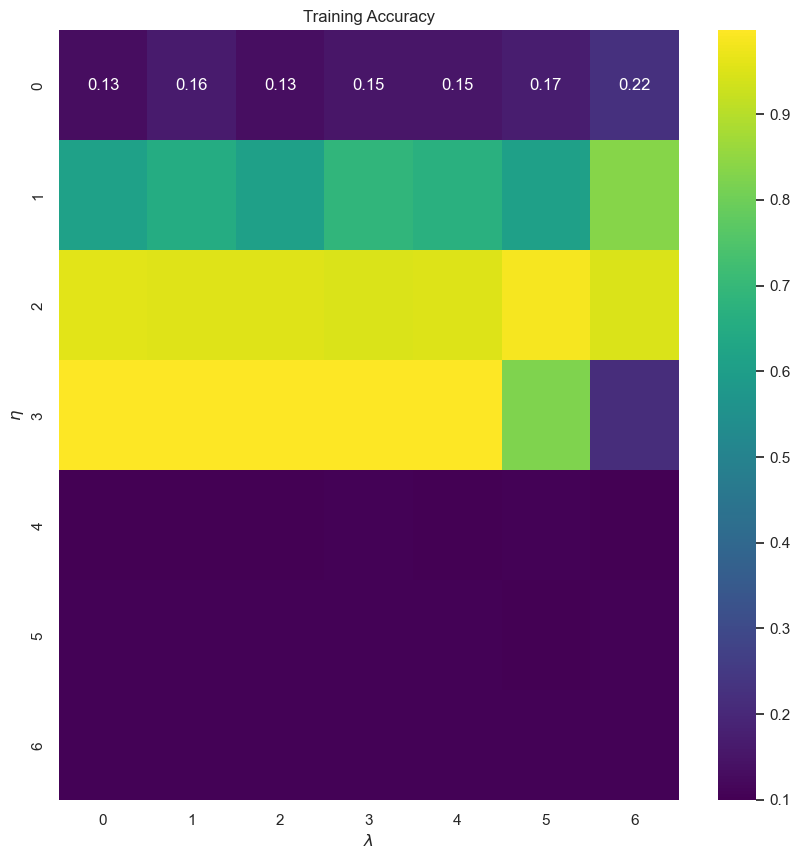

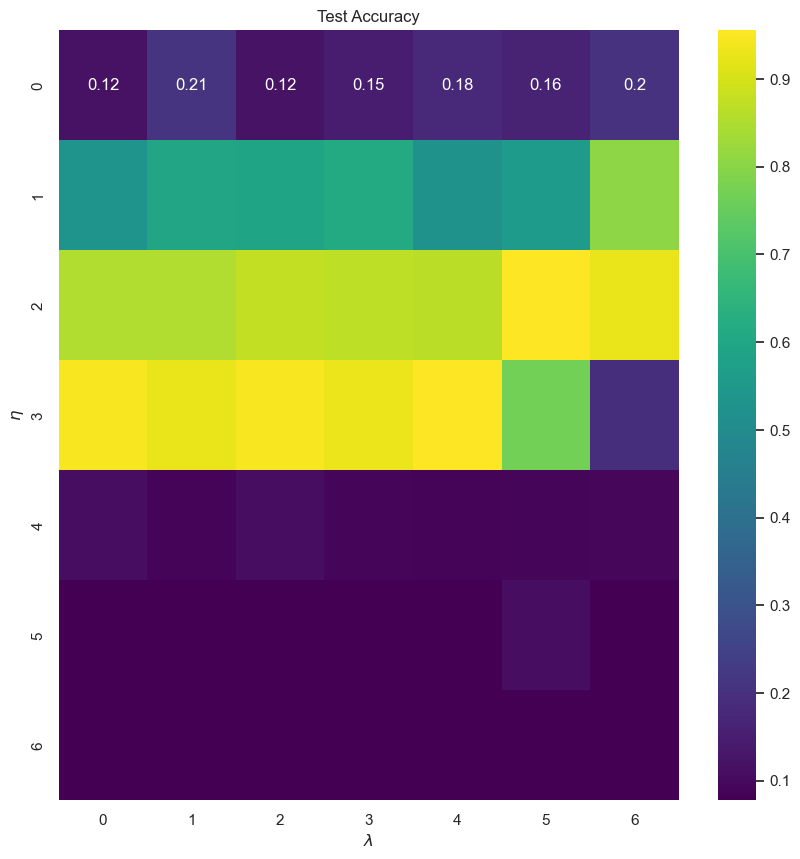

In [11]:
# visual representation of grid search
# uses seaborn heatmap, you can also do this with matplotlib imshow
import seaborn as sns

sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        dnn = DNN_numpy[i][j]
        
        train_pred = dnn.predict(X_train) 
        test_pred = dnn.predict(X_test)

        train_accuracy[i][j] = accuracy_score(Y_train, train_pred)
        test_accuracy[i][j] = accuracy_score(Y_test, test_pred)

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

## scikit-learn implementation

**scikit-learn** focuses more
on traditional machine learning methods, such as regression,
clustering, decision trees, etc. As such, it has only two types of
neural networks: Multi Layer Perceptron outputting continuous values,
*MPLRegressor*, and Multi Layer Perceptron outputting labels,
*MLPClassifier*. We will see how simple it is to use these classes.

**scikit-learn** implements a few improvements from our neural network,
such as early stopping, a varying learning rate, different
optimization methods, etc. We would therefore expect a better
performance overall.

In [12]:
from sklearn.neural_network import MLPClassifier
# store models for later use
DNN_scikit = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)

for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        dnn = MLPClassifier(hidden_layer_sizes=(n_hidden_neurons), activation='logistic',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs)
        dnn.fit(X_train, Y_train)
        
        DNN_scikit[i][j] = dnn
        
        print("Learning rate  = ", eta)
        print("Lambda = ", lmbd)
        print("Accuracy score on test set: ", dnn.score(X_test, Y_test))
        print()

/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  1e-05
Accuracy score on test set:  0.18333333333333332



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  0.0001
Accuracy score on test set:  0.18611111111111112



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  0.001
Accuracy score on test set:  0.13055555555555556



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  0.01
Accuracy score on test set:  0.24444444444444444



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  0.1
Accuracy score on test set:  0.23333333333333334



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  1.0
Accuracy score on test set:  0.12777777777777777



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  10.0
Accuracy score on test set:  0.1527777777777778



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  1e-05
Accuracy score on test set:  0.9111111111111111



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  0.0001
Accuracy score on test set:  0.8888888888888888



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  0.001
Accuracy score on test set:  0.8722222222222222



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  0.01
Accuracy score on test set:  0.8305555555555556



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  0.1
Accuracy score on test set:  0.8888888888888888



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  1.0
Accuracy score on test set:  0.8805555555555555



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  10.0
Accuracy score on test set:  0.8944444444444445



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  1e-05
Accuracy score on test set:  0.975



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  0.0001
Accuracy score on test set:  0.9777777777777777



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  0.001
Accuracy score on test set:  0.9805555555555555



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  0.01
Accuracy score on test set:  0.9861111111111112



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  0.1
Accuracy score on test set:  0.9805555555555555



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  1.0
Accuracy score on test set:  0.9777777777777777



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  10.0
Accuracy score on test set:  0.9444444444444444



/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.01
Lambda =  1e-05
Accuracy score on test set:  0.9861111111111112



Learning rate  =  0.01
Lambda =  0.0001
Accuracy score on test set:  0.9888888888888889



Learning rate  =  0.01
Lambda =  0.001
Accuracy score on test set:  0.9888888888888889



Learning rate  =  0.01
Lambda =  0.01
Accuracy score on test set:  0.9861111111111112



Learning rate  =  0.01
Lambda =  0.1
Accuracy score on test set:  0.9888888888888889



Learning rate  =  0.01
Lambda =  1.0
Accuracy score on test set:  0.9722222222222222

Learning rate  =  0.01
Lambda =  10.0
Accuracy score on test set:  0.9527777777777777



Learning rate  =  0.1
Lambda =  1e-05
Accuracy score on test set:  0.9027777777777778

Learning rate  =  0.1
Lambda =  0.0001
Accuracy score on test set:  0.8583333333333333



Learning rate  =  0.1
Lambda =  0.001
Accuracy score on test set:  0.8722222222222222



Learning rate  =  0.1
Lambda =  0.01
Accuracy score on test set:  0.9055555555555556

Learning rate  =  0.1
Lambda =  0.1
Accuracy score on test set:  0.8805555555555555



Learning rate  =  0.1
Lambda =  1.0
Accuracy score on test set:  0.8722222222222222

Learning rate  =  0.1
Lambda =  10.0
Accuracy score on test set:  0.8666666666666667



Learning rate  =  1.0
Lambda =  1e-05
Accuracy score on test set:  0.08611111111111111



Learning rate  =  1.0
Lambda =  0.0001
Accuracy score on test set:  0.10555555555555556



Learning rate  =  1.0
Lambda =  0.001
Accuracy score on test set:  0.10555555555555556

Learning rate  =  1.0
Lambda =  0.01
Accuracy score on test set:  0.17777777777777778

Learning rate  =  1.0
Lambda =  0.1
Accuracy score on test set:  0.08333333333333333



Learning rate  =  1.0
Lambda =  1.0
Accuracy score on test set:  0.08888888888888889

Learning rate  =  1.0
Lambda =  10.0
Accuracy score on test set:  0.09444444444444444



Learning rate  =  10.0
Lambda =  1e-05
Accuracy score on test set:  0.17222222222222222



Learning rate  =  10.0
Lambda =  0.0001
Accuracy score on test set:  0.11666666666666667

Learning rate  =  10.0
Lambda =  0.001
Accuracy score on test set:  0.10555555555555556

Learning rate  =  10.0
Lambda =  0.01
Accuracy score on test set:  0.1388888888888889

Learning rate  =  10.0
Lambda =  0.1
Accuracy score on test set:  0.11388888888888889



Learning rate  =  10.0
Lambda =  1.0
Accuracy score on test set:  0.10555555555555556

Learning rate  =  10.0
Lambda =  10.0
Accuracy score on test set:  0.09444444444444444



## Visualization

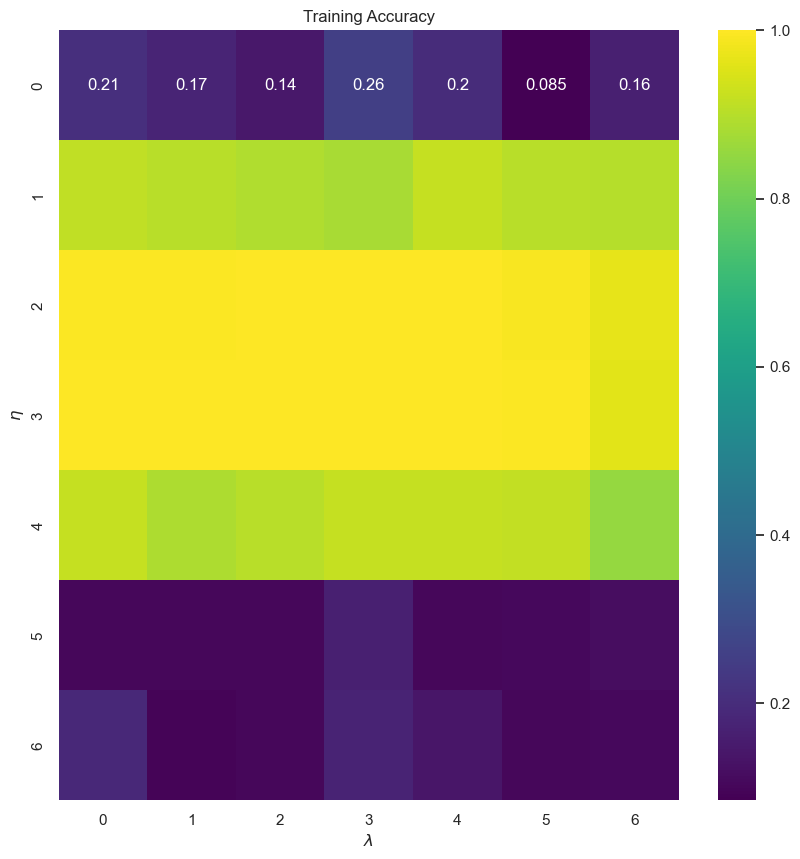

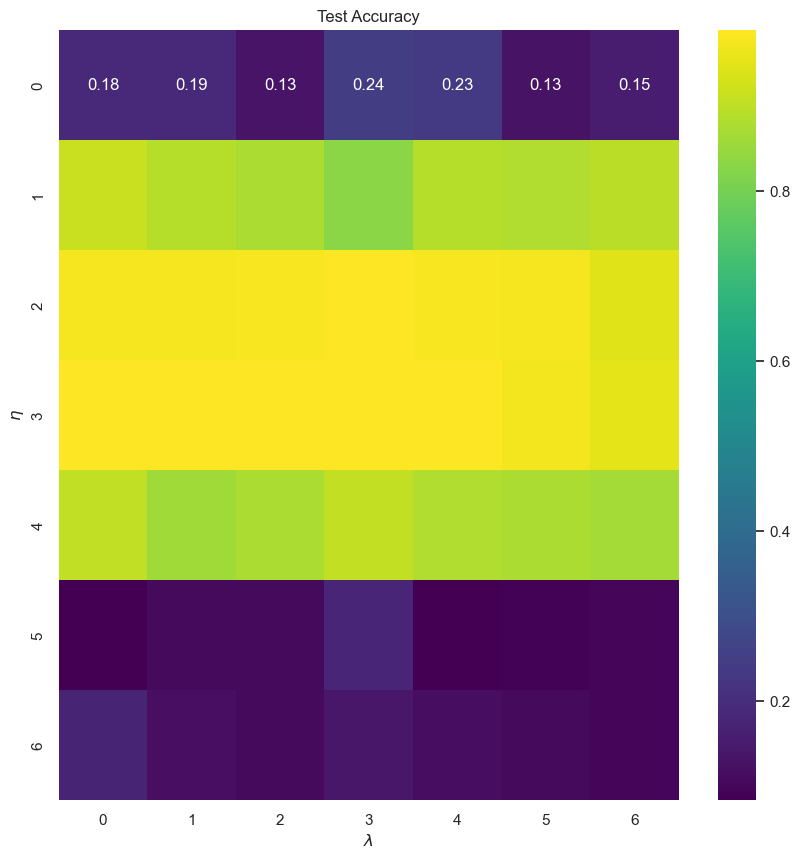

In [13]:
# optional
# visual representation of grid search
# uses seaborn heatmap, could probably do this in matplotlib
import seaborn as sns

sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        dnn = DNN_scikit[i][j]
        
        train_pred = dnn.predict(X_train) 
        test_pred = dnn.predict(X_test)

        train_accuracy[i][j] = accuracy_score(Y_train, train_pred)
        test_accuracy[i][j] = accuracy_score(Y_test, test_pred)

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

## Building neural networks in Tensorflow and Keras

Now we want  to build on the experience gained from our neural network implementation in NumPy and scikit-learn
and use it to construct a neural network in Tensorflow. Once we have constructed a neural network in NumPy
and Tensorflow, building one in Keras is really quite trivial, though the performance may suffer.  

In our previous example we used only one hidden layer, and in this we will use two. From this it should be quite
clear how to build one using an arbitrary number of hidden layers, using data structures such as Python lists or
NumPy arrays.

## Tensorflow

Tensorflow is an open source library machine learning library
developed by the Google Brain team for internal use. It was released
under the Apache 2.0 open source license in November 9, 2015.

Tensorflow is a computational framework that allows you to construct
machine learning models at different levels of abstraction, from
high-level, object-oriented APIs like Keras, down to the C++ kernels
that Tensorflow is built upon. The higher levels of abstraction are
simpler to use, but less flexible, and our choice of implementation
should reflect the problems we are trying to solve.

[Tensorflow uses](https://www.tensorflow.org/guide/graphs) so-called graphs to represent your computation
in terms of the dependencies between individual operations, such that you first build a Tensorflow *graph*
to represent your model, and then create a Tensorflow *session* to run the graph.

In this guide we will analyze the same data as we did in our NumPy and
scikit-learn tutorial, gathered from the MNIST database of images. We
will give an introduction to the lower level Python Application
Program Interfaces (APIs), and see how we use them to build our graph.
Then we will build (effectively) the same graph in Keras, to see just
how simple solving a machine learning problem can be.

To install tensorflow on Unix/Linux systems, use pip as

In [14]:
pip3 install tensorflow

SyntaxError: invalid syntax (2357089093.py, line 1)

and/or if you use **anaconda**, just write (or install from the graphical user interface)
(current release of CPU-only TensorFlow)

In [15]:
conda create -n tf tensorflow
conda activate tf

To install the current release of GPU TensorFlow

In [16]:
conda create -n tf-gpu tensorflow-gpu
conda activate tf-gpu

## Using Keras

Keras is a high level [neural network](https://en.wikipedia.org/wiki/Application_programming_interface)
that supports Tensorflow, CTNK and Theano as backends.  
If you have Anaconda installed you may run the following command

In [17]:
conda install keras

You can look up the [instructions here](https://keras.io/) for more information.

We will to a large extent use **keras** in this course.

## Collect and pre-process data

Let us look again at the MINST data set.

In [18]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets


# ensure the same random numbers appear every time
np.random.seed(0)

# display images in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)


# download MNIST dataset
digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

print("inputs = (n_inputs, pixel_width, pixel_height) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# flatten the image
# the value -1 means dimension is inferred from the remaining dimensions: 8x8 = 64
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
print("X = (n_inputs, n_features) = " + str(inputs.shape))


# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()

In [19]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential      #This allows appending layers to existing models
from tensorflow.keras.layers import Dense           #This allows defining the characteristics of a particular layer
from tensorflow.keras import optimizers             #This allows using whichever optimiser we want (sgd,adam,RMSprop)
from tensorflow.keras import regularizers           #This allows using whichever regularizer we want (l1,l2,l1_l2)
from tensorflow.keras.utils import to_categorical   #This allows using categorical cross entropy as the cost function

from sklearn.model_selection import train_test_split

# one-hot representation of labels
labels = to_categorical(labels)

# split into train and test data
train_size = 0.8
test_size = 1 - train_size
X_train, X_test, Y_train, Y_test = train_test_split(inputs, labels, train_size=train_size,
                                                    test_size=test_size)

In [20]:

epochs = 100
batch_size = 100
n_neurons_layer1 = 100
n_neurons_layer2 = 50
n_categories = 10
eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)
def create_neural_network_keras(n_neurons_layer1, n_neurons_layer2, n_categories, eta, lmbd):
    model = Sequential()
    model.add(Dense(n_neurons_layer1, activation='sigmoid', kernel_regularizer=regularizers.l2(lmbd)))
    model.add(Dense(n_neurons_layer2, activation='sigmoid', kernel_regularizer=regularizers.l2(lmbd)))
    model.add(Dense(n_categories, activation='softmax'))
    
    sgd = optimizers.SGD(lr=eta)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    return model

In [21]:
DNN_keras = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
        
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        DNN = create_neural_network_keras(n_neurons_layer1, n_neurons_layer2, n_categories,
                                         eta=eta, lmbd=lmbd)
        DNN.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        scores = DNN.evaluate(X_test, Y_test)
        
        DNN_keras[i][j] = DNN
        
        print("Learning rate = ", eta)
        print("Lambda = ", lmbd)
        print("Test accuracy: %.3f" % scores[1])
        print()

In [22]:
# optional
# visual representation of grid search
# uses seaborn heatmap, could probably do this in matplotlib
import seaborn as sns

sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        DNN = DNN_keras[i][j]

        train_accuracy[i][j] = DNN.evaluate(X_train, Y_train)[1]
        test_accuracy[i][j] = DNN.evaluate(X_test, Y_test)[1]

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

## The Breast Cancer Data, now with Keras

In [23]:

import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential      #This allows appending layers to existing models
from tensorflow.keras.layers import Dense           #This allows defining the characteristics of a particular layer
from tensorflow.keras import optimizers             #This allows using whichever optimiser we want (sgd,adam,RMSprop)
from tensorflow.keras import regularizers           #This allows using whichever regularizer we want (l1,l2,l1_l2)
from tensorflow.keras.utils import to_categorical   #This allows using categorical cross entropy as the cost function
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as splitter
from sklearn.datasets import load_breast_cancer
import pickle
import os 


"""Load breast cancer dataset"""

np.random.seed(0)        #create same seed for random number every time

cancer=load_breast_cancer()      #Download breast cancer dataset

inputs=cancer.data                     #Feature matrix of 569 rows (samples) and 30 columns (parameters)
outputs=cancer.target                  #Label array of 569 rows (0 for benign and 1 for malignant)
labels=cancer.feature_names[0:30]

print('The content of the breast cancer dataset is:')      #Print information about the datasets
print(labels)
print('-------------------------')
print("inputs =  " + str(inputs.shape))
print("outputs =  " + str(outputs.shape))
print("labels =  "+ str(labels.shape))

x=inputs      #Reassign the Feature and Label matrices to other variables
y=outputs

#%% 

# Visualisation of dataset (for correlation analysis)

plt.figure()
plt.scatter(x[:,0],x[:,2],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean radius',fontweight='bold')
plt.ylabel('Mean perimeter',fontweight='bold')
plt.show()

plt.figure()
plt.scatter(x[:,5],x[:,6],s=40,c=y, cmap=plt.cm.Spectral)
plt.xlabel('Mean compactness',fontweight='bold')
plt.ylabel('Mean concavity',fontweight='bold')
plt.show()


plt.figure()
plt.scatter(x[:,0],x[:,1],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean radius',fontweight='bold')
plt.ylabel('Mean texture',fontweight='bold')
plt.show()

plt.figure()
plt.scatter(x[:,2],x[:,1],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean perimeter',fontweight='bold')
plt.ylabel('Mean compactness',fontweight='bold')
plt.show()


# Generate training and testing datasets

#Select features relevant to classification (texture,perimeter,compactness and symmetery) 
#and add to input matrix

temp1=np.reshape(x[:,1],(len(x[:,1]),1))
temp2=np.reshape(x[:,2],(len(x[:,2]),1))
X=np.hstack((temp1,temp2))      
temp=np.reshape(x[:,5],(len(x[:,5]),1))
X=np.hstack((X,temp))       
temp=np.reshape(x[:,8],(len(x[:,8]),1))
X=np.hstack((X,temp))       

X_train,X_test,y_train,y_test=splitter(X,y,test_size=0.1)   #Split datasets into training and testing

y_train=to_categorical(y_train)     #Convert labels to categorical when using categorical cross entropy
y_test=to_categorical(y_test)

del temp1,temp2,temp

# %%

# Define tunable parameters"

eta=np.logspace(-3,-1,3)                    #Define vector of learning rates (parameter to SGD optimiser)
lamda=0.01                                  #Define hyperparameter
n_layers=2                                  #Define number of hidden layers in the model
n_neuron=np.logspace(0,3,4,dtype=int)       #Define number of neurons per layer
epochs=100                                   #Number of reiterations over the input data
batch_size=100                              #Number of samples per gradient update

# %%

"""Define function to return Deep Neural Network model"""

def NN_model(inputsize,n_layers,n_neuron,eta,lamda):
    model=Sequential()      
    for i in range(n_layers):       #Run loop to add hidden layers to the model
        if (i==0):                  #First layer requires input dimensions
            model.add(Dense(n_neuron,activation='relu',kernel_regularizer=regularizers.l2(lamda),input_dim=inputsize))
        else:                       #Subsequent layers are capable of automatic shape inferencing
            model.add(Dense(n_neuron,activation='relu',kernel_regularizer=regularizers.l2(lamda)))
    model.add(Dense(2,activation='softmax'))  #2 outputs - ordered and disordered (softmax for prob)
    sgd=optimizers.SGD(lr=eta)
    model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
    return model

    
Train_accuracy=np.zeros((len(n_neuron),len(eta)))      #Define matrices to store accuracy scores as a function
Test_accuracy=np.zeros((len(n_neuron),len(eta)))       #of learning rate and number of hidden neurons for 

for i in range(len(n_neuron)):     #run loops over hidden neurons and learning rates to calculate 
    for j in range(len(eta)):      #accuracy scores 
        DNN_model=NN_model(X_train.shape[1],n_layers,n_neuron[i],eta[j],lamda)
        DNN_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)
        Train_accuracy[i,j]=DNN_model.evaluate(X_train,y_train)[1]
        Test_accuracy[i,j]=DNN_model.evaluate(X_test,y_test)[1]
               

def plot_data(x,y,data,title=None):

    # plot results
    fontsize=16


    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=1)
    
    cbar=fig.colorbar(cax)
    cbar.ax.set_ylabel('accuracy (%)',rotation=90,fontsize=fontsize)
    cbar.set_ticks([0,.2,.4,0.6,0.8,1.0])
    cbar.set_ticklabels(['0%','20%','40%','60%','80%','100%'])

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.1f}\\%$".format( 100*data[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center')

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str(i) for i in y]


    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(['']+y)

    ax.set_xlabel('$\\mathrm{learning\\ rate}$',fontsize=fontsize)
    ax.set_ylabel('$\\mathrm{hidden\\ neurons}$',fontsize=fontsize)
    if title is not None:
        ax.set_title(title)

    plt.tight_layout()

    plt.show()
    
plot_data(eta,n_neuron,Train_accuracy, 'training')
plot_data(eta,n_neuron,Test_accuracy, 'testing')

## Building a neural network code

Here we  present a flexible object oriented codebase
for a feed forward neural network, along with a demonstration of how
to use it. Before we get into the details of the neural network, we
will first present some implementations of various schedulers, cost
functions and activation functions that can be used together with the
neural network.

The codes here were developed by Eric Reber and Gregor Kajda during spring 2023.

### Learning rate methods

The code below shows object oriented implementations of the Constant,
Momentum, Adagrad, AdagradMomentum, RMS prop and Adam schedulers. All
of the classes belong to the shared abstract Scheduler class, and
share the update_change() and reset() methods allowing for any of the
schedulers to be seamlessly used during the training stage, as will
later be shown in the fit() method of the neural
network. Update_change() only has one parameter, the gradient
($δ^l_ja^{l−1}_k$), and returns the change which will be subtracted
from the weights. The reset() function takes no parameters, and resets
the desired variables. For Constant and Momentum, reset does nothing.

In [24]:
import autograd.numpy as np

class Scheduler:
    """
    Abstract class for Schedulers
    """

    def __init__(self, eta):
        self.eta = eta

    # should be overwritten
    def update_change(self, gradient):
        raise NotImplementedError

    # overwritten if needed
    def reset(self):
        pass


class Constant(Scheduler):
    def __init__(self, eta):
        super().__init__(eta)

    def update_change(self, gradient):
        return self.eta * gradient
    
    def reset(self):
        pass


class Momentum(Scheduler):
    def __init__(self, eta: float, momentum: float):
        super().__init__(eta)
        self.momentum = momentum
        self.change = 0

    def update_change(self, gradient):
        self.change = self.momentum * self.change + self.eta * gradient
        return self.change

    def reset(self):
        pass


class Adagrad(Scheduler):
    def __init__(self, eta):
        super().__init__(eta)
        self.G_t = None

    def update_change(self, gradient):
        delta = 1e-8  # avoid division ny zero

        if self.G_t is None:
            self.G_t = np.zeros((gradient.shape[0], gradient.shape[0]))

        self.G_t += gradient @ gradient.T

        G_t_inverse = 1 / (
            delta + np.sqrt(np.reshape(np.diagonal(self.G_t), (self.G_t.shape[0], 1)))
        )
        return self.eta * gradient * G_t_inverse

    def reset(self):
        self.G_t = None


class AdagradMomentum(Scheduler):
    def __init__(self, eta, momentum):
        super().__init__(eta)
        self.G_t = None
        self.momentum = momentum
        self.change = 0

    def update_change(self, gradient):
        delta = 1e-8  # avoid division ny zero

        if self.G_t is None:
            self.G_t = np.zeros((gradient.shape[0], gradient.shape[0]))

        self.G_t += gradient @ gradient.T

        G_t_inverse = 1 / (
            delta + np.sqrt(np.reshape(np.diagonal(self.G_t), (self.G_t.shape[0], 1)))
        )
        self.change = self.change * self.momentum + self.eta * gradient * G_t_inverse
        return self.change

    def reset(self):
        self.G_t = None


class RMS_prop(Scheduler):
    def __init__(self, eta, rho):
        super().__init__(eta)
        self.rho = rho
        self.second = 0.0

    def update_change(self, gradient):
        delta = 1e-8  # avoid division ny zero
        self.second = self.rho * self.second + (1 - self.rho) * gradient * gradient
        return self.eta * gradient / (np.sqrt(self.second + delta))

    def reset(self):
        self.second = 0.0


class Adam(Scheduler):
    def __init__(self, eta, rho, rho2):
        super().__init__(eta)
        self.rho = rho
        self.rho2 = rho2
        self.moment = 0
        self.second = 0
        self.n_epochs = 1

    def update_change(self, gradient):
        delta = 1e-8  # avoid division ny zero

        self.moment = self.rho * self.moment + (1 - self.rho) * gradient
        self.second = self.rho2 * self.second + (1 - self.rho2) * gradient * gradient

        moment_corrected = self.moment / (1 - self.rho**self.n_epochs)
        second_corrected = self.second / (1 - self.rho2**self.n_epochs)

        return self.eta * moment_corrected / (np.sqrt(second_corrected + delta))

    def reset(self):
        self.n_epochs += 1
        self.moment = 0
        self.second = 0

### Usage of the above learning rate schedulers

To initalize a scheduler, simply create the object and pass in the
necessary parameters such as the learning rate and the momentum as
shown below. As the Scheduler class is an abstract class it should not
called directly, and will raise an error upon usage.

In [25]:
momentum_scheduler = Momentum(eta=1e-3, momentum=0.9)
adam_scheduler = Adam(eta=1e-3, rho=0.9, rho2=0.999)

Here is a small example for how a segment of code using schedulers
could look. Switching out the schedulers is simple.

In [26]:
weights = np.ones((3,3))
print(f"Before scheduler:\n{weights=}")

epochs = 10
for e in range(epochs):
    gradient = np.random.rand(3, 3)
    change = adam_scheduler.update_change(gradient)
    weights = weights - change
    adam_scheduler.reset()

print(f"\nAfter scheduler:\n{weights=}")

### Cost functions

Here we discuss cost functions that can be used when creating the
neural network. Every cost function takes the target vector as its
parameter, and returns a function valued only at $x$ such that it may
easily be differentiated.

In [27]:
import autograd.numpy as np

def CostOLS(target):
    
    def func(X):
        return (1.0 / target.shape[0]) * np.sum((target - X) ** 2)

    return func


def CostLogReg(target):

    def func(X):
        
        return -(1.0 / target.shape[0]) * np.sum(
            (target * np.log(X + 10e-10)) + ((1 - target) * np.log(1 - X + 10e-10))
        )

    return func


def CostCrossEntropy(target):
    
    def func(X):
        return -(1.0 / target.size) * np.sum(target * np.log(X + 10e-10))

    return func

Below we give a short example of how these cost function may be used
to obtain results if you wish to test them out on your own using
AutoGrad's automatics differentiation.

In [28]:
from autograd import grad

target = np.array([[1, 2, 3]]).T
a = np.array([[4, 5, 6]]).T

cost_func = CostCrossEntropy
cost_func_derivative = grad(cost_func(target))

valued_at_a = cost_func_derivative(a)
print(f"Derivative of cost function {cost_func.__name__} valued at a:\n{valued_at_a}")

### Activation functions

Finally, before we look at the neural network, we will look at the
activation functions which can be specified between the hidden layers
and as the output function. Each function can be valued for any given
vector or matrix X, and can be differentiated via derivate().

In [29]:
import autograd.numpy as np
from autograd import elementwise_grad

def identity(X):
    return X


def sigmoid(X):
    try:
        return 1.0 / (1 + np.exp(-X))
    except FloatingPointError:
        return np.where(X > np.zeros(X.shape), np.ones(X.shape), np.zeros(X.shape))


def softmax(X):
    X = X - np.max(X, axis=-1, keepdims=True)
    delta = 10e-10
    return np.exp(X) / (np.sum(np.exp(X), axis=-1, keepdims=True) + delta)


def RELU(X):
    return np.where(X > np.zeros(X.shape), X, np.zeros(X.shape))


def LRELU(X):
    delta = 10e-4
    return np.where(X > np.zeros(X.shape), X, delta * X)


def derivate(func):
    if func.__name__ == "RELU":

        def func(X):
            return np.where(X > 0, 1, 0)

        return func

    elif func.__name__ == "LRELU":

        def func(X):
            delta = 10e-4
            return np.where(X > 0, 1, delta)

        return func

    else:
        return elementwise_grad(func)

Below follows a short demonstration of how to use an activation
function. The derivative of the activation function will be important
when calculating the output delta term during backpropagation. Note
that derivate() can also be used for cost functions for a more
generalized approach.

In [30]:
z = np.array([[4, 5, 6]]).T
print(f"Input to activation function:\n{z}")

act_func = sigmoid
a = act_func(z)
print(f"\nOutput from {act_func.__name__} activation function:\n{a}")

act_func_derivative = derivate(act_func)
valued_at_z = act_func_derivative(a)
print(f"\nDerivative of {act_func.__name__} activation function valued at z:\n{valued_at_z}")

### The Neural Network

Now that we have gotten a good understanding of the implementation of
some important components, we can take a look at an object oriented
implementation of a feed forward neural network. The feed forward
neural network has been implemented as a class named FFNN, which can
be initiated as a regressor or classifier dependant on the choice of
cost function. The FFNN can have any number of input nodes, hidden
layers with any amount of hidden nodes, and any amount of output nodes
meaning it can perform multiclass classification as well as binary
classification and regression problems. Although there is a lot of
code present, it makes for an easy to use and generalizeable interface
for creating many types of neural networks as will be demonstrated
below.

In [31]:
import math
import autograd.numpy as np
import sys
import warnings
from autograd import grad, elementwise_grad
from random import random, seed
from copy import deepcopy, copy
from typing import Tuple, Callable
from sklearn.utils import resample

warnings.simplefilter("error")


class FFNN:
    """
    Description:
    ------------
        Feed Forward Neural Network with interface enabling flexible design of a
        nerual networks architecture and the specification of activation function
        in the hidden layers and output layer respectively. This model can be used
        for both regression and classification problems, depending on the output function.

    Attributes:
    ------------
        I   dimensions (tuple[int]): A list of positive integers, which specifies the
            number of nodes in each of the networks layers. The first integer in the array
            defines the number of nodes in the input layer, the second integer defines number
            of nodes in the first hidden layer and so on until the last number, which
            specifies the number of nodes in the output layer.
        II  hidden_func (Callable): The activation function for the hidden layers
        III output_func (Callable): The activation function for the output layer
        IV  cost_func (Callable): Our cost function
        V   seed (int): Sets random seed, makes results reproducible
    """

    def __init__(
        self,
        dimensions: tuple[int],
        hidden_func: Callable = sigmoid,
        output_func: Callable = lambda x: x,
        cost_func: Callable = CostOLS,
        seed: int = None,
    ):
        self.dimensions = dimensions
        self.hidden_func = hidden_func
        self.output_func = output_func
        self.cost_func = cost_func
        self.seed = seed
        self.weights = list()
        self.schedulers_weight = list()
        self.schedulers_bias = list()
        self.a_matrices = list()
        self.z_matrices = list()
        self.classification = None

        self.reset_weights()
        self._set_classification()

    def fit(
        self,
        X: np.ndarray,
        t: np.ndarray,
        scheduler: Scheduler,
        batches: int = 1,
        epochs: int = 100,
        lam: float = 0,
        X_val: np.ndarray = None,
        t_val: np.ndarray = None,
    ):
        """
        Description:
        ------------
            This function performs the training the neural network by performing the feedforward and backpropagation
            algorithm to update the networks weights.

        Parameters:
        ------------
            I    X (np.ndarray) : training data
            II   t (np.ndarray) : target data
            III  scheduler (Scheduler) : specified scheduler (algorithm for optimization of gradient descent)
            IV   scheduler_args (list[int]) : list of all arguments necessary for scheduler

        Optional Parameters:
        ------------
            V    batches (int) : number of batches the datasets are split into, default equal to 1
            VI   epochs (int) : number of iterations used to train the network, default equal to 100
            VII  lam (float) : regularization hyperparameter lambda
            VIII X_val (np.ndarray) : validation set
            IX   t_val (np.ndarray) : validation target set

        Returns:
        ------------
            I   scores (dict) : A dictionary containing the performance metrics of the model.
                The number of the metrics depends on the parameters passed to the fit-function.

        """

        # setup 
        if self.seed is not None:
            np.random.seed(self.seed)

        val_set = False
        if X_val is not None and t_val is not None:
            val_set = True

        # creating arrays for score metrics
        train_errors = np.empty(epochs)
        train_errors.fill(np.nan)
        val_errors = np.empty(epochs)
        val_errors.fill(np.nan)

        train_accs = np.empty(epochs)
        train_accs.fill(np.nan)
        val_accs = np.empty(epochs)
        val_accs.fill(np.nan)

        self.schedulers_weight = list()
        self.schedulers_bias = list()

        batch_size = X.shape[0] // batches

        X, t = resample(X, t)

        # this function returns a function valued only at X
        cost_function_train = self.cost_func(t)
        if val_set:
            cost_function_val = self.cost_func(t_val)

        # create schedulers for each weight matrix
        for i in range(len(self.weights)):
            self.schedulers_weight.append(copy(scheduler))
            self.schedulers_bias.append(copy(scheduler))

        print(f"{scheduler.__class__.__name__}: Eta={scheduler.eta}, Lambda={lam}")

        try:
            for e in range(epochs):
                for i in range(batches):
                    # allows for minibatch gradient descent
                    if i == batches - 1:
                        # If the for loop has reached the last batch, take all thats left
                        X_batch = X[i * batch_size :, :]
                        t_batch = t[i * batch_size :, :]
                    else:
                        X_batch = X[i * batch_size : (i + 1) * batch_size, :]
                        t_batch = t[i * batch_size : (i + 1) * batch_size, :]

                    self._feedforward(X_batch)
                    self._backpropagate(X_batch, t_batch, lam)

                # reset schedulers for each epoch (some schedulers pass in this call)
                for scheduler in self.schedulers_weight:
                    scheduler.reset()

                for scheduler in self.schedulers_bias:
                    scheduler.reset()

                # computing performance metrics
                pred_train = self.predict(X)
                train_error = cost_function_train(pred_train)

                train_errors[e] = train_error
                if val_set:
                    
                    pred_val = self.predict(X_val)
                    val_error = cost_function_val(pred_val)
                    val_errors[e] = val_error

                if self.classification:
                    train_acc = self._accuracy(self.predict(X), t)
                    train_accs[e] = train_acc
                    if val_set:
                        val_acc = self._accuracy(pred_val, t_val)
                        val_accs[e] = val_acc

                # printing progress bar
                progression = e / epochs
                print_length = self._progress_bar(
                    progression,
                    train_error=train_errors[e],
                    train_acc=train_accs[e],
                    val_error=val_errors[e],
                    val_acc=val_accs[e],
                )
        except KeyboardInterrupt:
            # allows for stopping training at any point and seeing the result
            pass

        # visualization of training progression (similiar to tensorflow progression bar)
        sys.stdout.write("\r" + " " * print_length)
        sys.stdout.flush()
        self._progress_bar(
            1,
            train_error=train_errors[e],
            train_acc=train_accs[e],
            val_error=val_errors[e],
            val_acc=val_accs[e],
        )
        sys.stdout.write("")

        # return performance metrics for the entire run
        scores = dict()

        scores["train_errors"] = train_errors

        if val_set:
            scores["val_errors"] = val_errors

        if self.classification:
            scores["train_accs"] = train_accs

            if val_set:
                scores["val_accs"] = val_accs

        return scores

    def predict(self, X: np.ndarray, *, threshold=0.5):
        """
         Description:
         ------------
             Performs prediction after training of the network has been finished.

         Parameters:
        ------------
             I   X (np.ndarray): The design matrix, with n rows of p features each

         Optional Parameters:
         ------------
             II  threshold (float) : sets minimal value for a prediction to be predicted as the positive class
                 in classification problems

         Returns:
         ------------
             I   z (np.ndarray): A prediction vector (row) for each row in our design matrix
                 This vector is thresholded if regression=False, meaning that classification results
                 in a vector of 1s and 0s, while regressions in an array of decimal numbers

        """

        predict = self._feedforward(X)

        if self.classification:
            return np.where(predict > threshold, 1, 0)
        else:
            return predict

    def reset_weights(self):
        """
        Description:
        ------------
            Resets/Reinitializes the weights in order to train the network for a new problem.

        """
        if self.seed is not None:
            np.random.seed(self.seed)

        self.weights = list()
        for i in range(len(self.dimensions) - 1):
            weight_array = np.random.randn(
                self.dimensions[i] + 1, self.dimensions[i + 1]
            )
            weight_array[0, :] = np.random.randn(self.dimensions[i + 1]) * 0.01

            self.weights.append(weight_array)

    def _feedforward(self, X: np.ndarray):
        """
        Description:
        ------------
            Calculates the activation of each layer starting at the input and ending at the output.
            Each following activation is calculated from a weighted sum of each of the preceeding
            activations (except in the case of the input layer).

        Parameters:
        ------------
            I   X (np.ndarray): The design matrix, with n rows of p features each

        Returns:
        ------------
            I   z (np.ndarray): A prediction vector (row) for each row in our design matrix
        """

        # reset matrices
        self.a_matrices = list()
        self.z_matrices = list()

        # if X is just a vector, make it into a matrix
        if len(X.shape) == 1:
            X = X.reshape((1, X.shape[0]))

        # Add a coloumn of zeros as the first coloumn of the design matrix, in order
        # to add bias to our data
        bias = np.ones((X.shape[0], 1)) * 0.01
        X = np.hstack([bias, X])

        # a^0, the nodes in the input layer (one a^0 for each row in X - where the
        # exponent indicates layer number).
        a = X
        self.a_matrices.append(a)
        self.z_matrices.append(a)

        # The feed forward algorithm
        for i in range(len(self.weights)):
            if i < len(self.weights) - 1:
                z = a @ self.weights[i]
                self.z_matrices.append(z)
                a = self.hidden_func(z)
                # bias column again added to the data here
                bias = np.ones((a.shape[0], 1)) * 0.01
                a = np.hstack([bias, a])
                self.a_matrices.append(a)
            else:
                try:
                    # a^L, the nodes in our output layers
                    z = a @ self.weights[i]
                    a = self.output_func(z)
                    self.a_matrices.append(a)
                    self.z_matrices.append(z)
                except Exception as OverflowError:
                    print(
                        "OverflowError in fit() in FFNN\nHOW TO DEBUG ERROR: Consider lowering your learning rate or scheduler specific parameters such as momentum, or check if your input values need scaling"
                    )

        # this will be a^L
        return a

    def _backpropagate(self, X, t, lam):
        """
        Description:
        ------------
            Performs the backpropagation algorithm. In other words, this method
            calculates the gradient of all the layers starting at the
            output layer, and moving from right to left accumulates the gradient until
            the input layer is reached. Each layers respective weights are updated while
            the algorithm propagates backwards from the output layer (auto-differentation in reverse mode).

        Parameters:
        ------------
            I   X (np.ndarray): The design matrix, with n rows of p features each.
            II  t (np.ndarray): The target vector, with n rows of p targets.
            III lam (float32): regularization parameter used to punish the weights in case of overfitting

        Returns:
        ------------
            No return value.

        """
        out_derivative = derivate(self.output_func)
        hidden_derivative = derivate(self.hidden_func)

        for i in range(len(self.weights) - 1, -1, -1):
            # delta terms for output
            if i == len(self.weights) - 1:
                # for multi-class classification
                if (
                    self.output_func.__name__ == "softmax"
                ):
                    delta_matrix = self.a_matrices[i + 1] - t
                # for single class classification
                else:
                    cost_func_derivative = grad(self.cost_func(t))
                    delta_matrix = out_derivative(
                        self.z_matrices[i + 1]
                    ) * cost_func_derivative(self.a_matrices[i + 1])

            # delta terms for hidden layer
            else:
                delta_matrix = (
                    self.weights[i + 1][1:, :] @ delta_matrix.T
                ).T * hidden_derivative(self.z_matrices[i + 1])

            # calculate gradient
            gradient_weights = self.a_matrices[i][:, 1:].T @ delta_matrix
            gradient_bias = np.sum(delta_matrix, axis=0).reshape(
                1, delta_matrix.shape[1]
            )

            # regularization term
            gradient_weights += self.weights[i][1:, :] * lam

            # use scheduler
            update_matrix = np.vstack(
                [
                    self.schedulers_bias[i].update_change(gradient_bias),
                    self.schedulers_weight[i].update_change(gradient_weights),
                ]
            )

            # update weights and bias
            self.weights[i] -= update_matrix

    def _accuracy(self, prediction: np.ndarray, target: np.ndarray):
        """
        Description:
        ------------
            Calculates accuracy of given prediction to target

        Parameters:
        ------------
            I   prediction (np.ndarray): vector of predicitons output network
                (1s and 0s in case of classification, and real numbers in case of regression)
            II  target (np.ndarray): vector of true values (What the network ideally should predict)

        Returns:
        ------------
            A floating point number representing the percentage of correctly classified instances.
        """
        assert prediction.size == target.size
        return np.average((target == prediction))
    def _set_classification(self):
        """
        Description:
        ------------
            Decides if FFNN acts as classifier (True) og regressor (False),
            sets self.classification during init()
        """
        self.classification = False
        if (
            self.cost_func.__name__ == "CostLogReg"
            or self.cost_func.__name__ == "CostCrossEntropy"
        ):
            self.classification = True

    def _progress_bar(self, progression, **kwargs):
        """
        Description:
        ------------
            Displays progress of training
        """
        print_length = 40
        num_equals = int(progression * print_length)
        num_not = print_length - num_equals
        arrow = ">" if num_equals > 0 else ""
        bar = "[" + "=" * (num_equals - 1) + arrow + "-" * num_not + "]"
        perc_print = self._format(progression * 100, decimals=5)
        line = f"  {bar} {perc_print}% "

        for key in kwargs:
            if not np.isnan(kwargs[key]):
                value = self._format(kwargs[key], decimals=4)
                line += f"| {key}: {value} "
        sys.stdout.write("\r" + line)
        sys.stdout.flush()
        return len(line)

    def _format(self, value, decimals=4):
        """
        Description:
        ------------
            Formats decimal numbers for progress bar
        """
        if value > 0:
            v = value
        elif value < 0:
            v = -10 * value
        else:
            v = 1
        n = 1 + math.floor(math.log10(v))
        if n >= decimals - 1:
            return str(round(value))
        return f"{value:.{decimals-n-1}f}"

Before we make a model, we will quickly generate a dataset we can use
for our linear regression problem as shown below

In [32]:
import autograd.numpy as np
from sklearn.model_selection import train_test_split

def SkrankeFunction(x, y):
    return np.ravel(0 + 1*x + 2*y + 3*x**2 + 4*x*y + 5*y**2)

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y**k)

    return X

step=0.5
x = np.arange(0, 1, step)
y = np.arange(0, 1, step)
x, y = np.meshgrid(x, y)
target = SkrankeFunction(x, y)
target = target.reshape(target.shape[0], 1)

poly_degree=3
X = create_X(x, y, poly_degree)

X_train, X_test, t_train, t_test = train_test_split(X, target)

Now that we have our dataset ready for the regression, we can create
our regressor. Note that with the seed parameter, we can make sure our
results stay the same every time we run the neural network. For
inititialization, we simply specify the dimensions (we wish the amount
of input nodes to be equal to the datapoints, and the output to
predict one value).

In [33]:
input_nodes = X_train.shape[1]
output_nodes = 1

linear_regression = FFNN((input_nodes, output_nodes), output_func=identity, cost_func=CostOLS, seed=2023)

We then fit our model with our training data using the scheduler of our choice.

In [34]:
linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Constant(eta=1e-3)
scores = linear_regression.fit(X_train, t_train, scheduler)

Due to the progress bar we can see the MSE (train_error) throughout
the FFNN's training. Note that the fit() function has some optional
parameters with defualt arguments. For example, the regularization
hyperparameter can be left ignored if not needed, and equally the FFNN
will by default run for 100 epochs. These can easily be changed, such
as for example:

In [35]:
linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scores = linear_regression.fit(X_train, t_train, scheduler, lam=1e-4, epochs=1000)

We see that given more epochs to train on, the regressor reaches a lower MSE.

Let us then switch to a binary classification. We use a binary
classification dataset, and follow a similar setup to the regression
case.

In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

wisconsin = load_breast_cancer()
X = wisconsin.data
target = wisconsin.target
target = target.reshape(target.shape[0], 1)

X_train, X_val, t_train, t_val = train_test_split(X, target)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [37]:
input_nodes = X_train.shape[1]
output_nodes = 1

logistic_regression = FFNN((input_nodes, output_nodes), output_func=sigmoid, cost_func=CostLogReg, seed=2023)

We will now make use of our validation data by passing it into our fit function as a keyword argument

In [38]:
logistic_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Adam(eta=1e-3, rho=0.9, rho2=0.999)
scores = logistic_regression.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)

Finally, we will create a neural network with 2 hidden layers with activation functions.

In [39]:
input_nodes = X_train.shape[1]
hidden_nodes1 = 100
hidden_nodes2 = 30
output_nodes = 1

dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)

neural_network = FFNN(dims, hidden_func=RELU, output_func=sigmoid, cost_func=CostLogReg, seed=2023)

In [40]:
neural_network.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Adam(eta=1e-4, rho=0.9, rho2=0.999)
scores = neural_network.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)

### Multiclass classification

Finally, we will demonstrate the use case of multiclass classification
using our FFNN with the famous MNIST dataset, which contain images of
digits between the range of 0 to 9.

In [41]:
from sklearn.datasets import load_digits

def onehot(target: np.ndarray):
    onehot = np.zeros((target.size, target.max() + 1))
    onehot[np.arange(target.size), target] = 1
    return onehot

digits = load_digits()

X = digits.data
target = digits.target
target = onehot(target)

input_nodes = 64
hidden_nodes1 = 100
hidden_nodes2 = 30
output_nodes = 10

dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)

multiclass = FFNN(dims, hidden_func=LRELU, output_func=softmax, cost_func=CostCrossEntropy)

multiclass.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Adam(eta=1e-4, rho=0.9, rho2=0.999)
scores = multiclass.fit(X, target, scheduler, epochs=1000)

## Testing the XOR gate and other gates

Let us now use our code to test the XOR gate.

In [42]:
X = np.array([ [0, 0], [0, 1], [1, 0],[1, 1]],dtype=np.float64)

# The XOR gate
yXOR = np.array( [[ 0], [1] ,[1], [0]])

input_nodes = X.shape[1]
output_nodes = 1

logistic_regression = FFNN((input_nodes, output_nodes), output_func=sigmoid, cost_func=CostLogReg, seed=2023)
logistic_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights
scheduler = Adam(eta=1e-1, rho=0.9, rho2=0.999)
scores = logistic_regression.fit(X, yXOR, scheduler, epochs=1000)

Not bad, but the results depend strongly on the learning reate. Try different learning rates.